# Lead Scoring Case Study 

In [2]:
# Import all the libraries for Data Analysis, Visualisation & Logisic Regression

# Libraries for Dataset analysis
import pandas as pd
import numpy as np

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Split the data into traning & test data sets
from sklearn.model_selection import train_test_split

# For Standardisation & Scaling
from sklearn.preprocessing import StandardScaler

# For building logistic regression model
import statsmodels.api as sm

# Import RFE used in feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


# Check for VIF value of the variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import  compute accuracy scores & Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [3]:
#Set option to display max 100 columns & 500 rows
pd.set_option('display.max_columns', 100)
pd.set_option("display.max_rows", 500)

##   Data Analysis 

In [4]:
# Read the data from the CSV file into a DataFrame
leads_df = pd.read_csv("Leads.csv")

In [5]:
#Get the shape (row and column count of the data)
leads_df.shape

(9240, 37)

In [6]:
#Get the columns wise info - Datatypes and missing values
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Check the sample values using df.head()
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
#Check the sample values using df.tail()
leads_df.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [9]:
#Get the distribution of Numerical values
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
# Check the column wise null percentages.

leads_null_fields=round((leads_df.isna().sum())/len(leads_df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64


In [11]:
# Check the row wise null percentages. Find rows with more than 30% of Column data having NULLs

leads_null_rows=round(((leads_df.isna().sum(axis=1))/leads_df.shape[1]) * 100,2)
print(leads_null_rows[leads_null_rows > 30])

963     32.43
1363    32.43
2633    32.43
2635    32.43
2671    35.14
        ...  
7400    32.43
8203    32.43
8216    32.43
8252    32.43
8544    32.43
Length: 645, dtype: float64


In [12]:
# Check the unique counts for all columns across the data set
for x in leads_df.columns:
    print(x+':',len(leads_df[x].unique()))

Prospect ID: 9240
Lead Number: 9240
Lead Origin: 5
Lead Source: 22
Do Not Email: 2
Do Not Call: 2
Converted: 2
TotalVisits: 42
Total Time Spent on Website: 1731
Page Views Per Visit: 115
Last Activity: 18
Country: 39
Specialization: 20
How did you hear about X Education: 11
What is your current occupation: 7
What matters most to you in choosing a course: 4
Search: 2
Magazine: 1
Newspaper Article: 2
X Education Forums: 2
Newspaper: 2
Digital Advertisement: 2
Through Recommendations: 2
Receive More Updates About Our Courses: 1
Tags: 27
Lead Quality: 6
Update me on Supply Chain Content: 1
Get updates on DM Content: 1
Lead Profile: 7
City: 8
Asymmetrique Activity Index: 4
Asymmetrique Profile Index: 4
Asymmetrique Activity Score: 13
Asymmetrique Profile Score: 11
I agree to pay the amount through cheque: 1
A free copy of Mastering The Interview: 2
Last Notable Activity: 16


In [13]:
# removing the column Prospect ID; Lead Number is a unique value already
leads_df = leads_df.drop('Prospect ID', axis=1)

# removing the five columns which are constant across all rows; they don't add any value to the model
leads_df = leads_df.drop('Magazine', axis=1)
leads_df = leads_df.drop('Receive More Updates About Our Courses', axis=1)
leads_df = leads_df.drop('Update me on Supply Chain Content', axis=1)
leads_df = leads_df.drop('Get updates on DM Content', axis=1)
leads_df = leads_df.drop('I agree to pay the amount through cheque', axis=1)

In [14]:
leads_df.shape

(9240, 31)

In [15]:
# The rows for which the count of Null fields is greater than 1/3rd ( > 10) are to be removed 
# and rows with <= 1/3rd (<=10) are retained

leads_df = leads_df[leads_df.isnull().sum(axis=1) <= 10]
leads_df.shape

(8576, 31)

## Univariate Analysis of Categorical variables

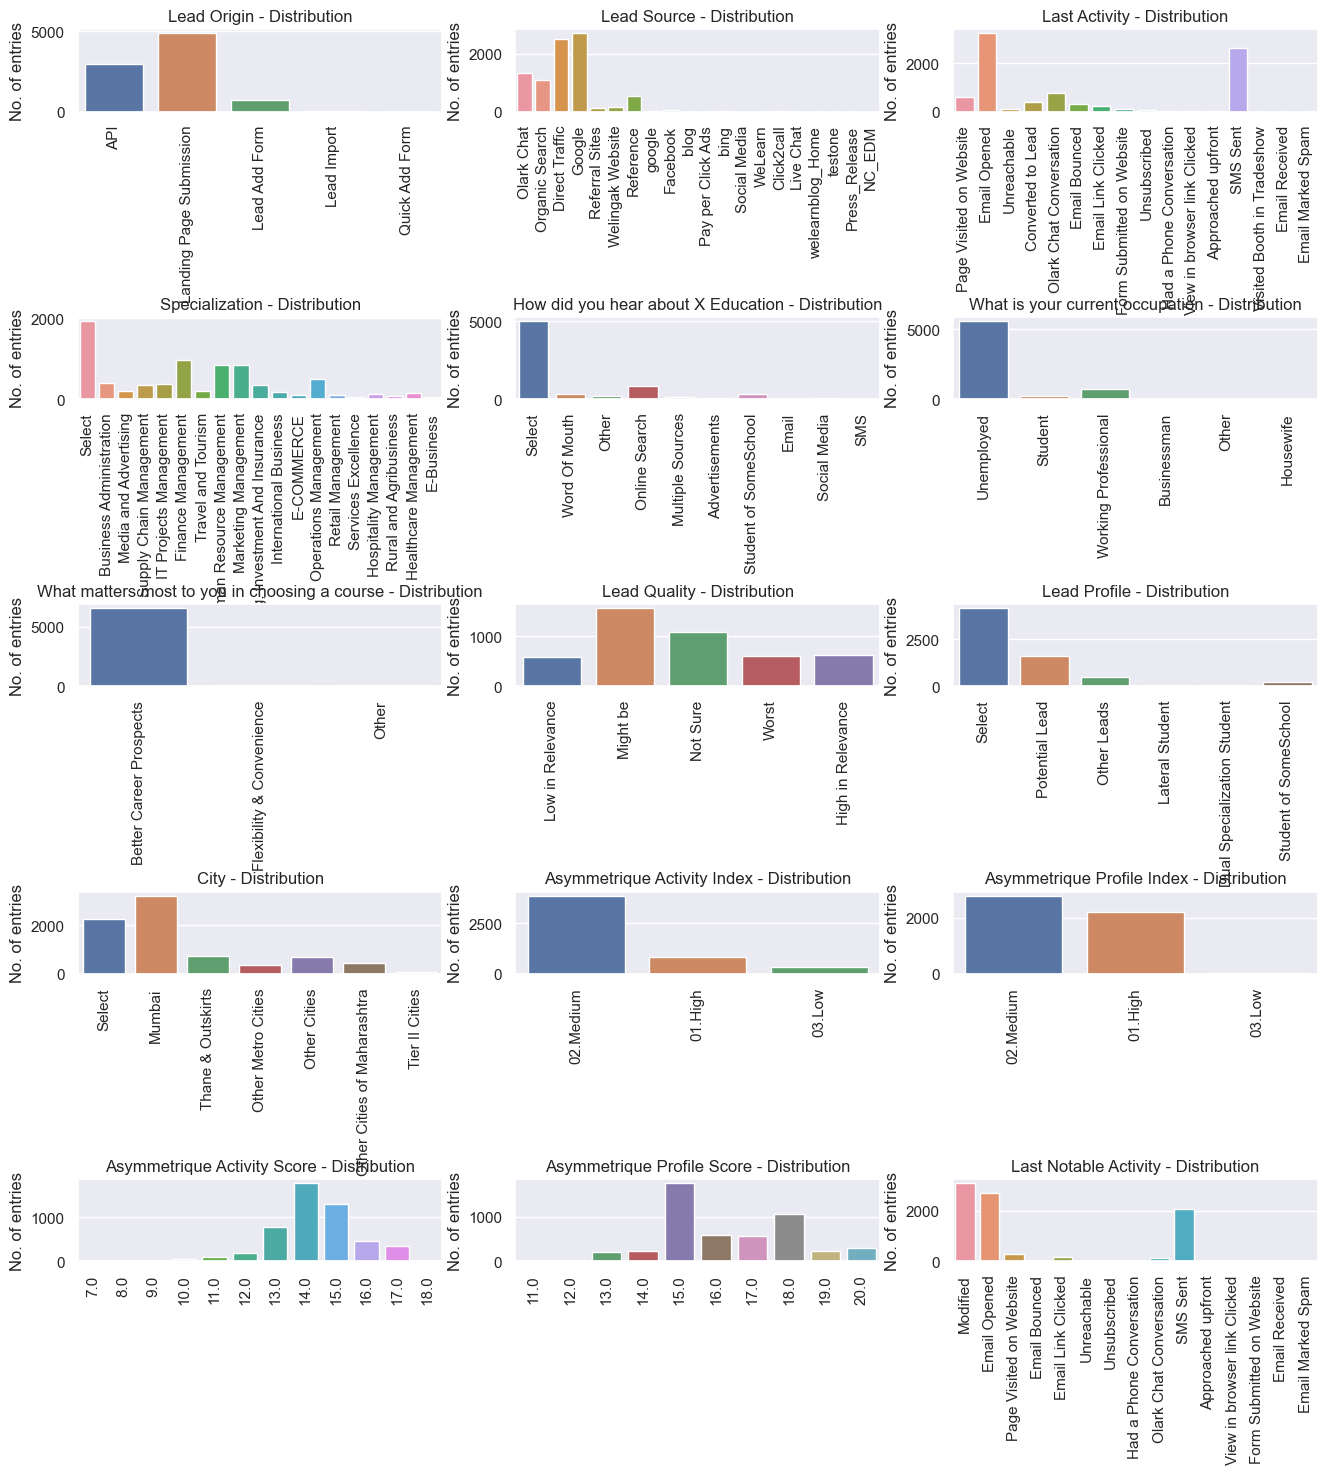

In [16]:
# Check the distribution of Categorical variables to get an idea of how the values are spread
col_list_for_count=['Lead Origin','Lead Source','Last Activity','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Last Notable Activity']
sns.set(style="darkgrid")

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count)):
    plt.subplot(5, 3, i+1)
    var=col_list_for_count[i]
    sns.countplot(x=var, data=leads_df)
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 2.5)

### From the above Univariate Analysis of Categorical variables, we can see that a value called "Select" is present in some of the fields. This is mostly a drop-down value which was left as it is - as good as Data Not available. We can consider it as NaN for all Practical purposes

In [17]:
# Assign the np.NaN to the column values which are mentioned as Select
select_varlist = ['Specialization','How did you hear about X Education','Lead Profile','City']

##Check the Unique values with counts in all remaining fields after replacing with np.NaN
for x in select_varlist:
    leads_df[x].replace('Select',np.NaN,inplace=True)

In [18]:
# Check the column wise null percentages. And start handling the NULL values

leads_null_fields=round((leads_df.isna().sum())/len(leads_df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Lead Source                                       0.41
TotalVisits                                       1.57
Page Views Per Visit                              1.57
Last Activity                                     1.19
Country                                          23.85
Specialization                                   31.79
How did you hear about X Education               76.80
What is your current occupation                  23.64
What matters most to you in choosing a course    23.86
Tags                                             31.44
Lead Quality                                     47.84
Lead Profile                                     72.19
City                                             35.13
Asymmetrique Activity Index                      41.45
Asymmetrique Profile Index                       41.45
Asymmetrique Activity Score                      41.45
Asymmetrique Profile Score                       41.45
dtype: float64


### Bivariate Analysis of Categorical variables

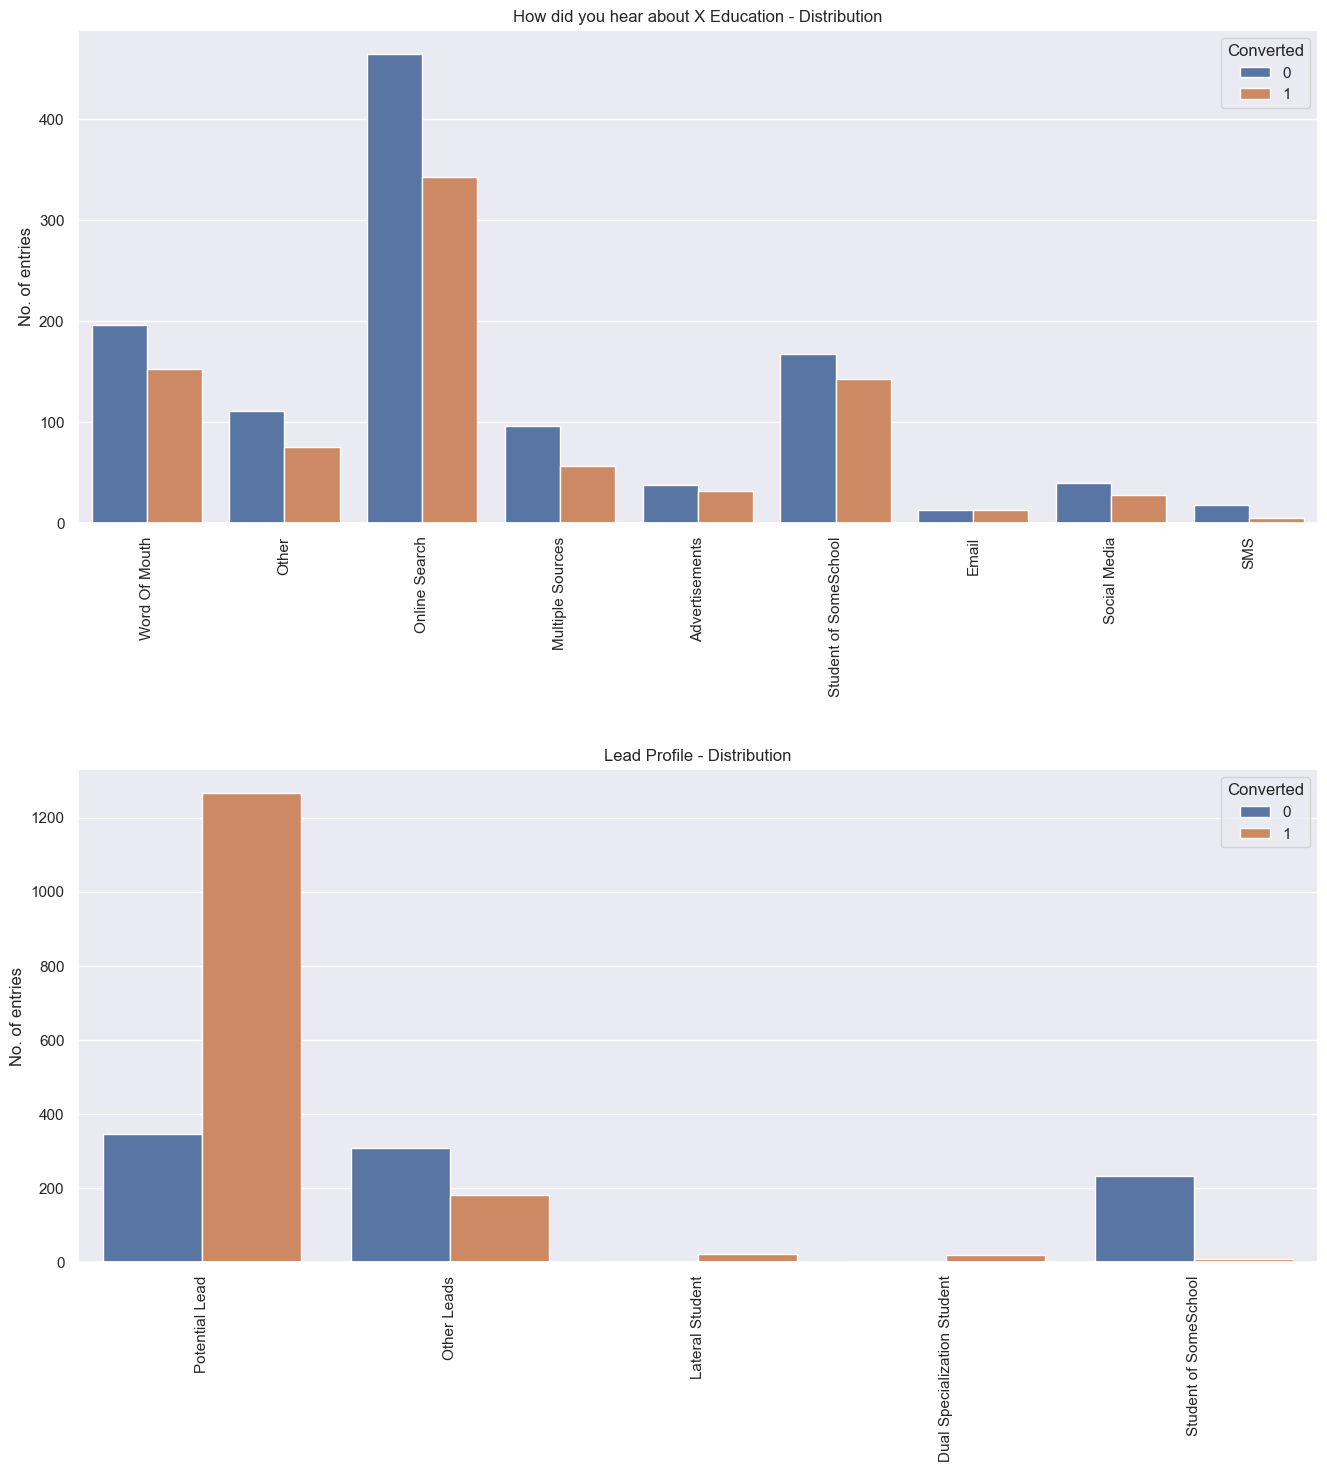

In [19]:
# Check the variables with very high NULL values
col_list_for_count3=['How did you hear about X Education','Lead Profile']
sns.set(style="darkgrid")

# Visualising the histogram of the distribution of these two categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count3)):
    plt.subplot(2, 1, i+1)
    var=col_list_for_count3[i]
    #sns.countplot(leads_df[var])
    sns.countplot(x= var, hue = 'Converted', data = leads_df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)

In [20]:
# Drop the columns with more than 50% NULL values & adding no value to the Model

# Drop "How did you hear about X Education" column as it has very high NULL values & doesn't have much inference from it
leads_df=leads_df.drop('How did you hear about X Education',axis=1)

In [21]:
# Check the values of Asymmetric Index and Score
print(leads_df['Asymmetrique Activity Index'].value_counts())
print(leads_df['Asymmetrique Activity Score'].value_counts())
print(leads_df['Asymmetrique Profile Index'].value_counts())
print(leads_df['Asymmetrique Profile Score'].value_counts())

02.Medium    3839
01.High       820
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     348
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64
02.Medium    2787
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64
15.0    1758
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64


### Clean the values in Assymetrique Columns

In [22]:
## Update the values in Assymmetrique columns
assymm_index_list = ['Asymmetrique Activity Index','Asymmetrique Profile Index']
leads_df[assymm_index_list] = leads_df[assymm_index_list].apply(lambda x: x.map({'01.High':'High','02.Medium':'Medium','03.Low':'Low'}))

print(leads_df['Asymmetrique Activity Index'].value_counts())
print(leads_df['Asymmetrique Profile Index'].value_counts())

Medium    3839
High       820
Low        362
Name: Asymmetrique Activity Index, dtype: int64
Medium    2787
High      2203
Low         31
Name: Asymmetrique Profile Index, dtype: int64


### The Assymetrique Scores are already grouped by Asymmetrique Index columns. So, we can drop the Scores.

In [23]:
# Drop the Asymmetrique columns with score values - as they are already explained by Index columns

leads_df=leads_df.drop('Asymmetrique Activity Score',axis=1)
leads_df=leads_df.drop('Asymmetrique Profile Score',axis=1)

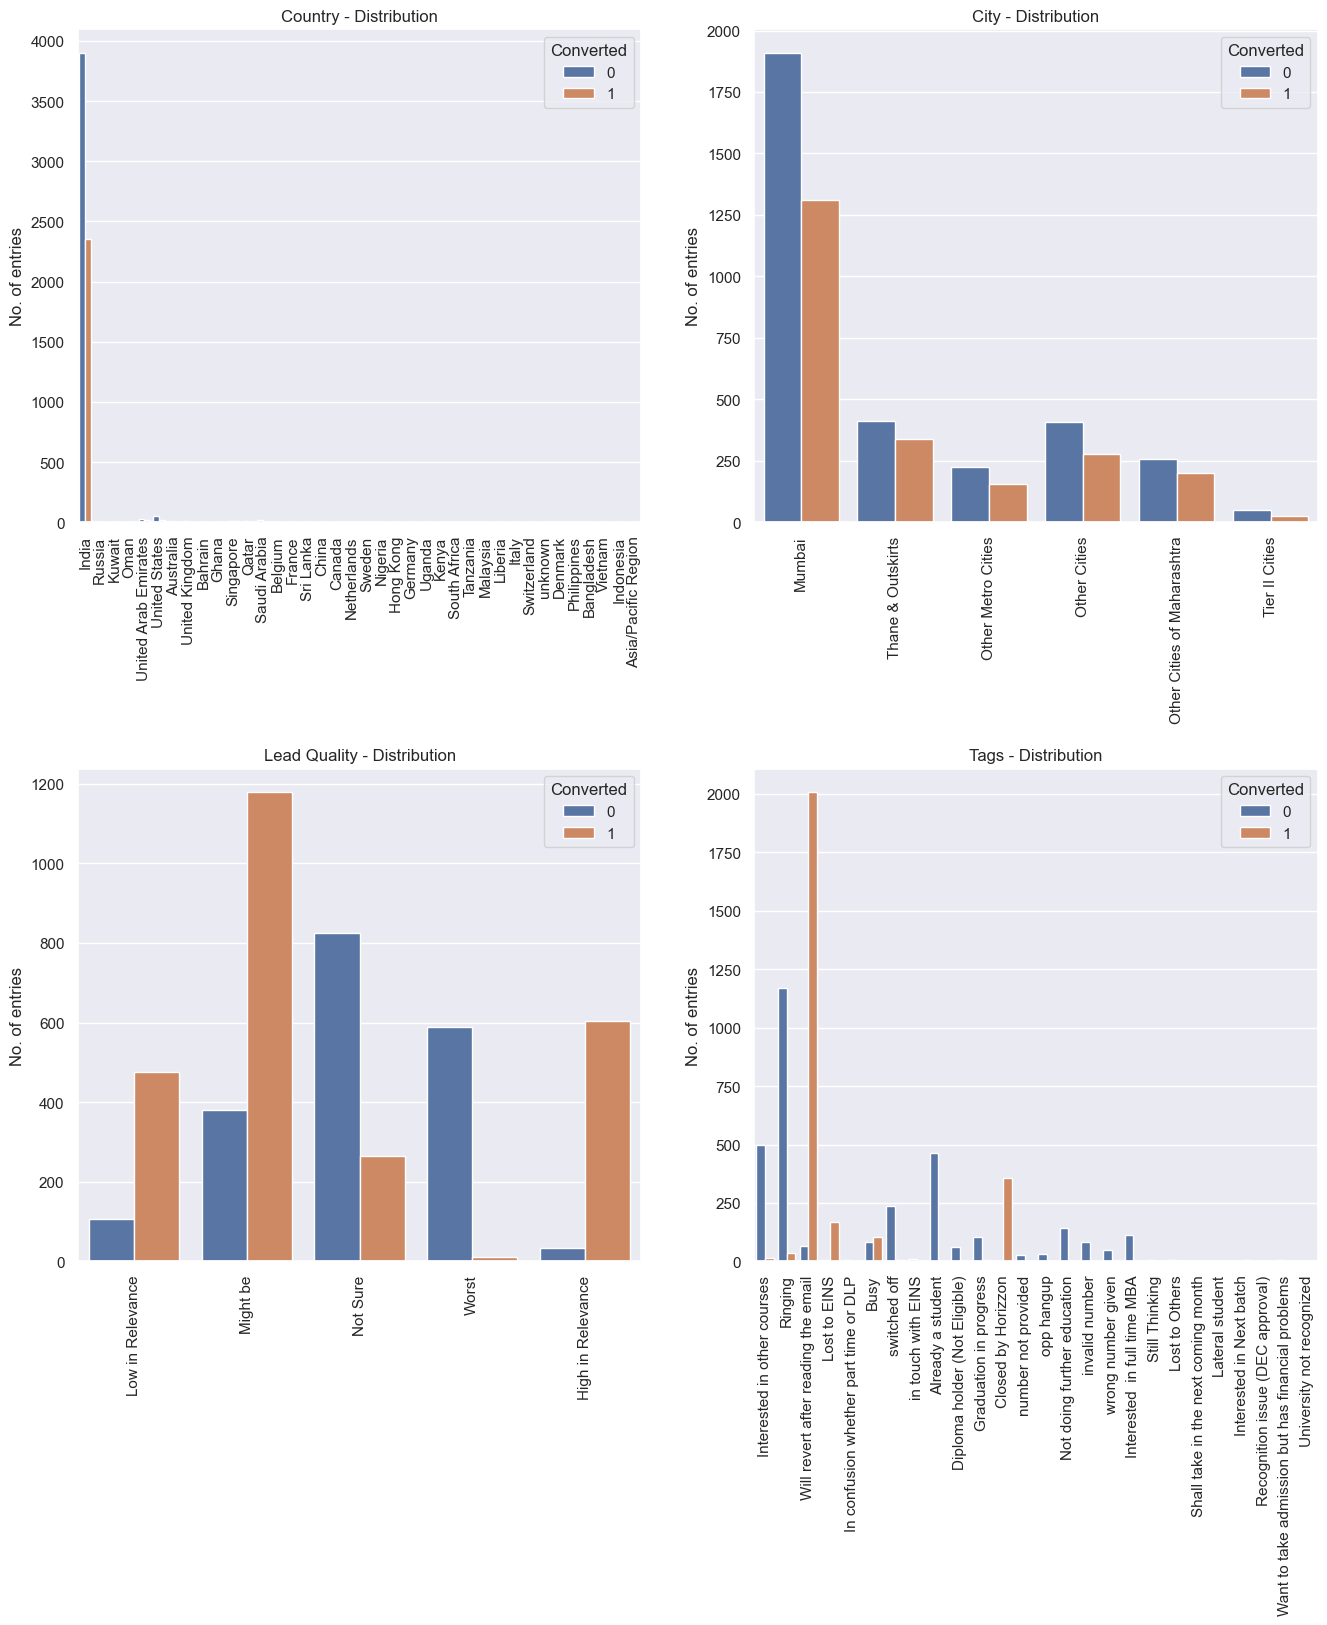

In [24]:
col_list_for_count2=['Country','City','Lead Quality','Tags']
sns.set(style="darkgrid")

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count2)):
    plt.subplot(2, 2, i+1)
    var=col_list_for_count2[i]
    sns.countplot(x= var, hue = 'Converted', data = leads_df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)

### Country and City are locations 
- Country values with 23% being null
- City values with 35% being null
- From the count plots above it is clear that neither the Country nor City have a major influence on conversion rates
- So dropping both the fields

In [25]:
# Dropping both the location fields

leads_df=leads_df.drop('Country',axis=1)
leads_df=leads_df.drop('City',axis=1)

In [26]:
# Check the column wise null percentages.

leads_null_fields=round((leads_df.isna().sum())/len(leads_df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Lead Source                                       0.41
TotalVisits                                       1.57
Page Views Per Visit                              1.57
Last Activity                                     1.19
Specialization                                   31.79
What is your current occupation                  23.64
What matters most to you in choosing a course    23.86
Tags                                             31.44
Lead Quality                                     47.84
Lead Profile                                     72.19
Asymmetrique Activity Index                      41.45
Asymmetrique Profile Index                       41.45
dtype: float64


In [27]:
# Verify the description of numerical field that are NULL
leads_df[['TotalVisits','Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,8441.000000,8441.000000
mean,3.603720,2.475223
std,4.954932,2.156764
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.500000
max,251.000000,55.000000


In [28]:
# Verify the description of numerical field which are having NULL
leads_df.loc[leads_df['TotalVisits'] == 3]['Page Views Per Visit'].describe()

count    1248.000000
mean        2.654247
std         0.648270
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Page Views Per Visit, dtype: float64

In [29]:
# Impute the NULLs in "TotalVisits" using median
leads_df['TotalVisits'].fillna((leads_df['TotalVisits'].median()), inplace=True)

# Impute the NULLs in "Page Views Per Visit" using mean calculated using the "median value of TotalVisits"
leads_df['Page Views Per Visit'].replace(np.NaN,2.65,inplace=True)

# Check the remaining NULL fields
leads_null_fields=round((leads_df.isna().sum())/len(leads_df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Lead Source                                       0.41
Last Activity                                     1.19
Specialization                                   31.79
What is your current occupation                  23.64
What matters most to you in choosing a course    23.86
Tags                                             31.44
Lead Quality                                     47.84
Lead Profile                                     72.19
Asymmetrique Activity Index                      41.45
Asymmetrique Profile Index                       41.45
dtype: float64


In [30]:
# For the Categorical variables "Lead Scource" and "Last Activity" - as the NULL count is very less, impute with MODE

leads_df['Lead Source'].fillna((leads_df['Lead Source'].mode()[0]), inplace=True)
leads_df['Last Activity'].fillna((leads_df['Last Activity'].mode()[0]), inplace=True)

In [31]:
# Assign the np.NaN to the another 2 column values which are mentioned as Select
col_list_for_count3=['What is your current occupation','What matters most to you in choosing a course']

##Check the Unique values with counts in all remaining fields after replacing with np.NaN
for x in col_list_for_count3:
    leads_df[x].replace('Select',np.NaN,inplace=True)

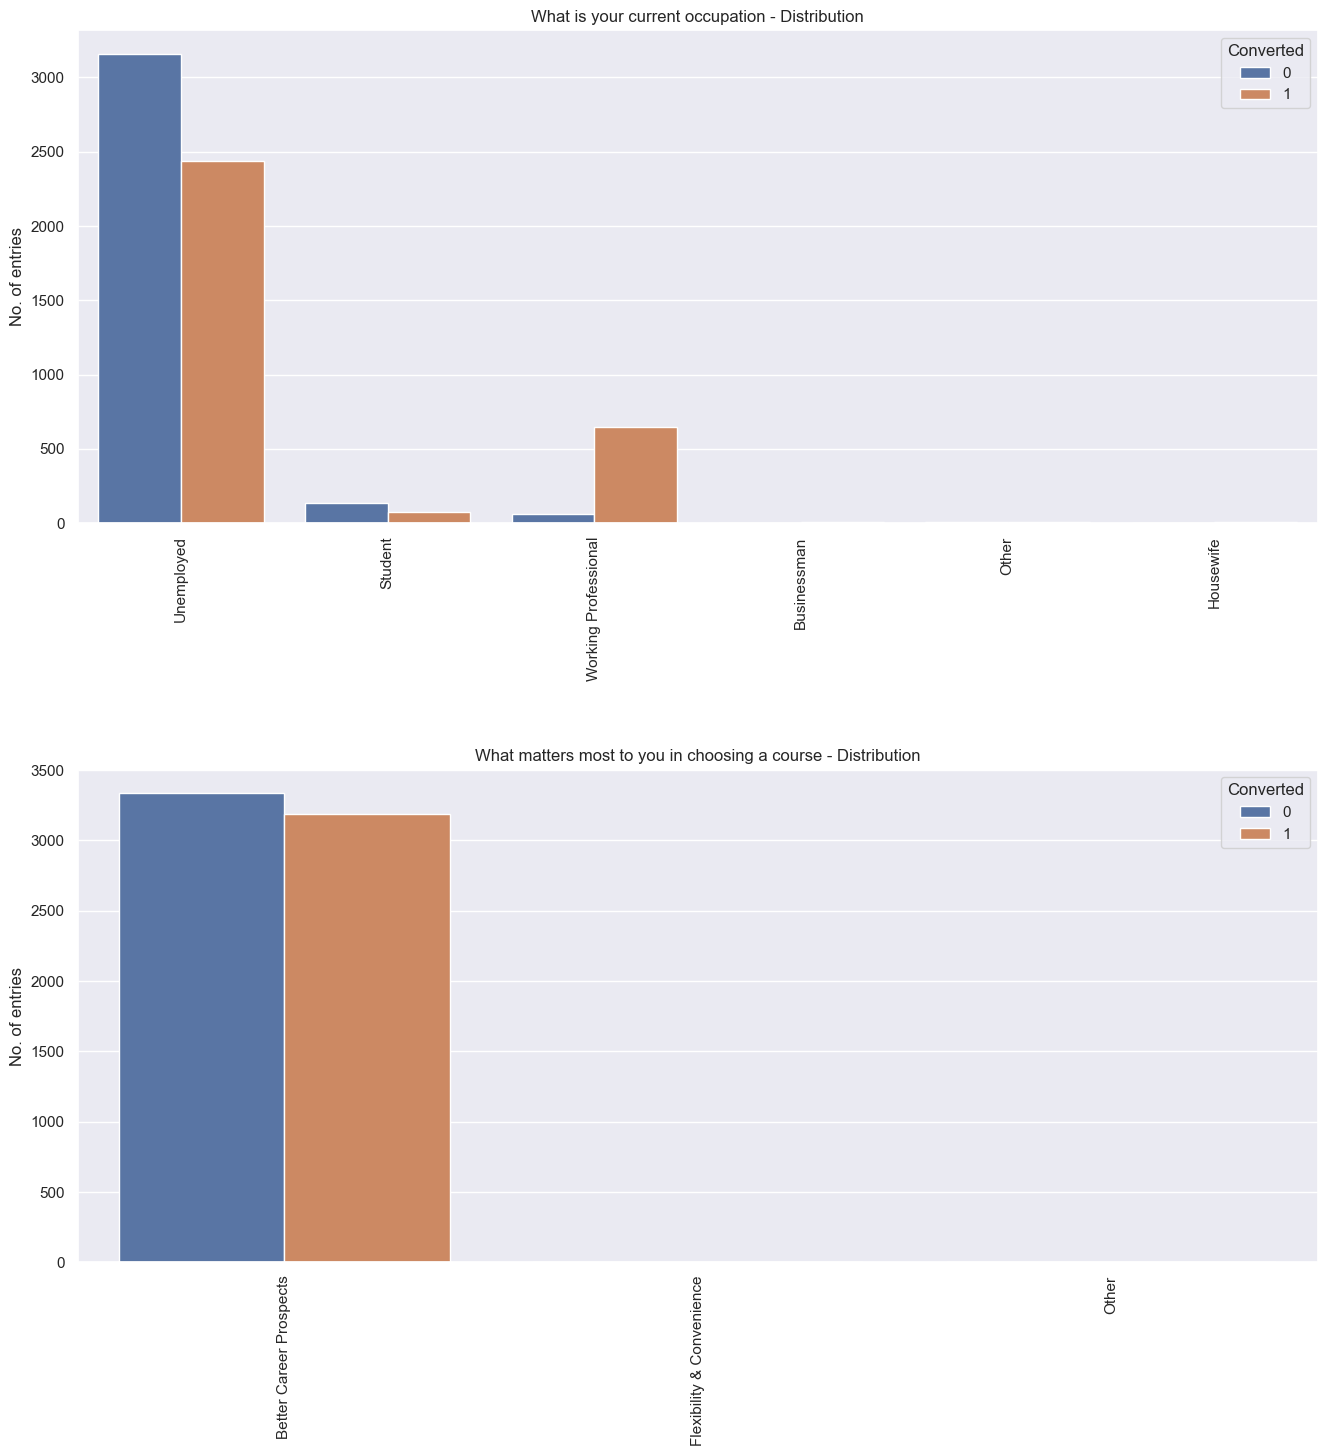

In [32]:
sns.set(style="darkgrid")

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count3)):
    plt.subplot(2, 1, i+1)
    var=col_list_for_count3[i]
    sns.countplot(x= var, hue = 'Converted', data = leads_df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)

What matters most to you in choosing a course: For this column, majority of the values are "Better Career Prospects". This column does not add much value

In [33]:
# Drop the field
leads_df=leads_df.drop('What matters most to you in choosing a course',axis=1)

In [34]:
# For occupation, let's replace the NaN values with Unknown as value as imputing with any other will create bias

leads_df['What is your current occupation'].fillna(('Unknown'), inplace=True)

Text(0.5, 0, '')

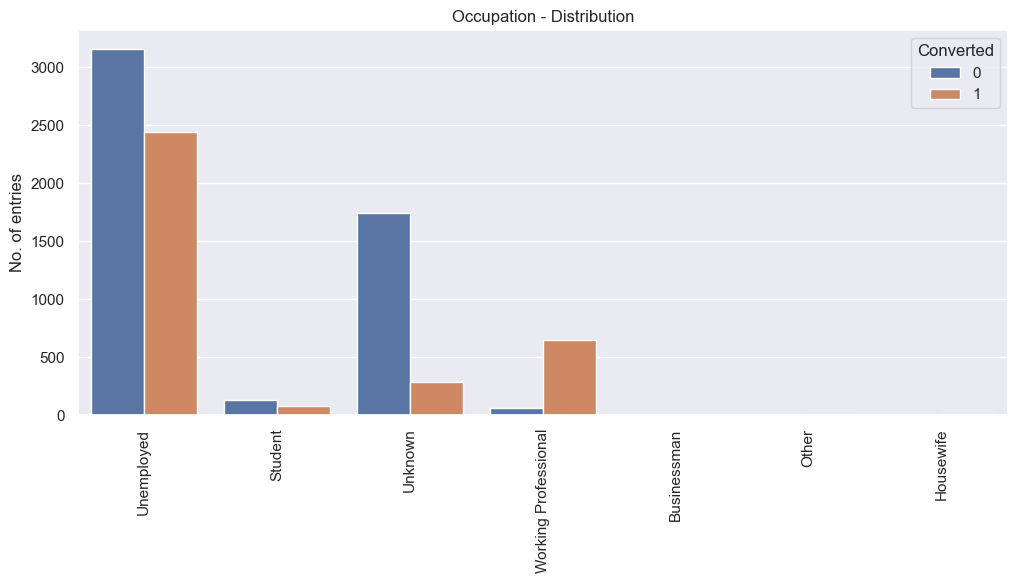

In [35]:
# Visualising the histogram of the distribution of occupation variables
plt.figure(figsize=(12,5))
sns.countplot(x= 'What is your current occupation', hue = 'Converted', data = leads_df)
plt.xticks(rotation=90)
plt.title('Plotting data for target in terms of total count')
plt.title('Occupation - Distribution')
plt.ylabel('No. of entries')
plt.xticks(rotation=90)
plt.xlabel(None)

### Check and start cleaning of remaining categorical variables

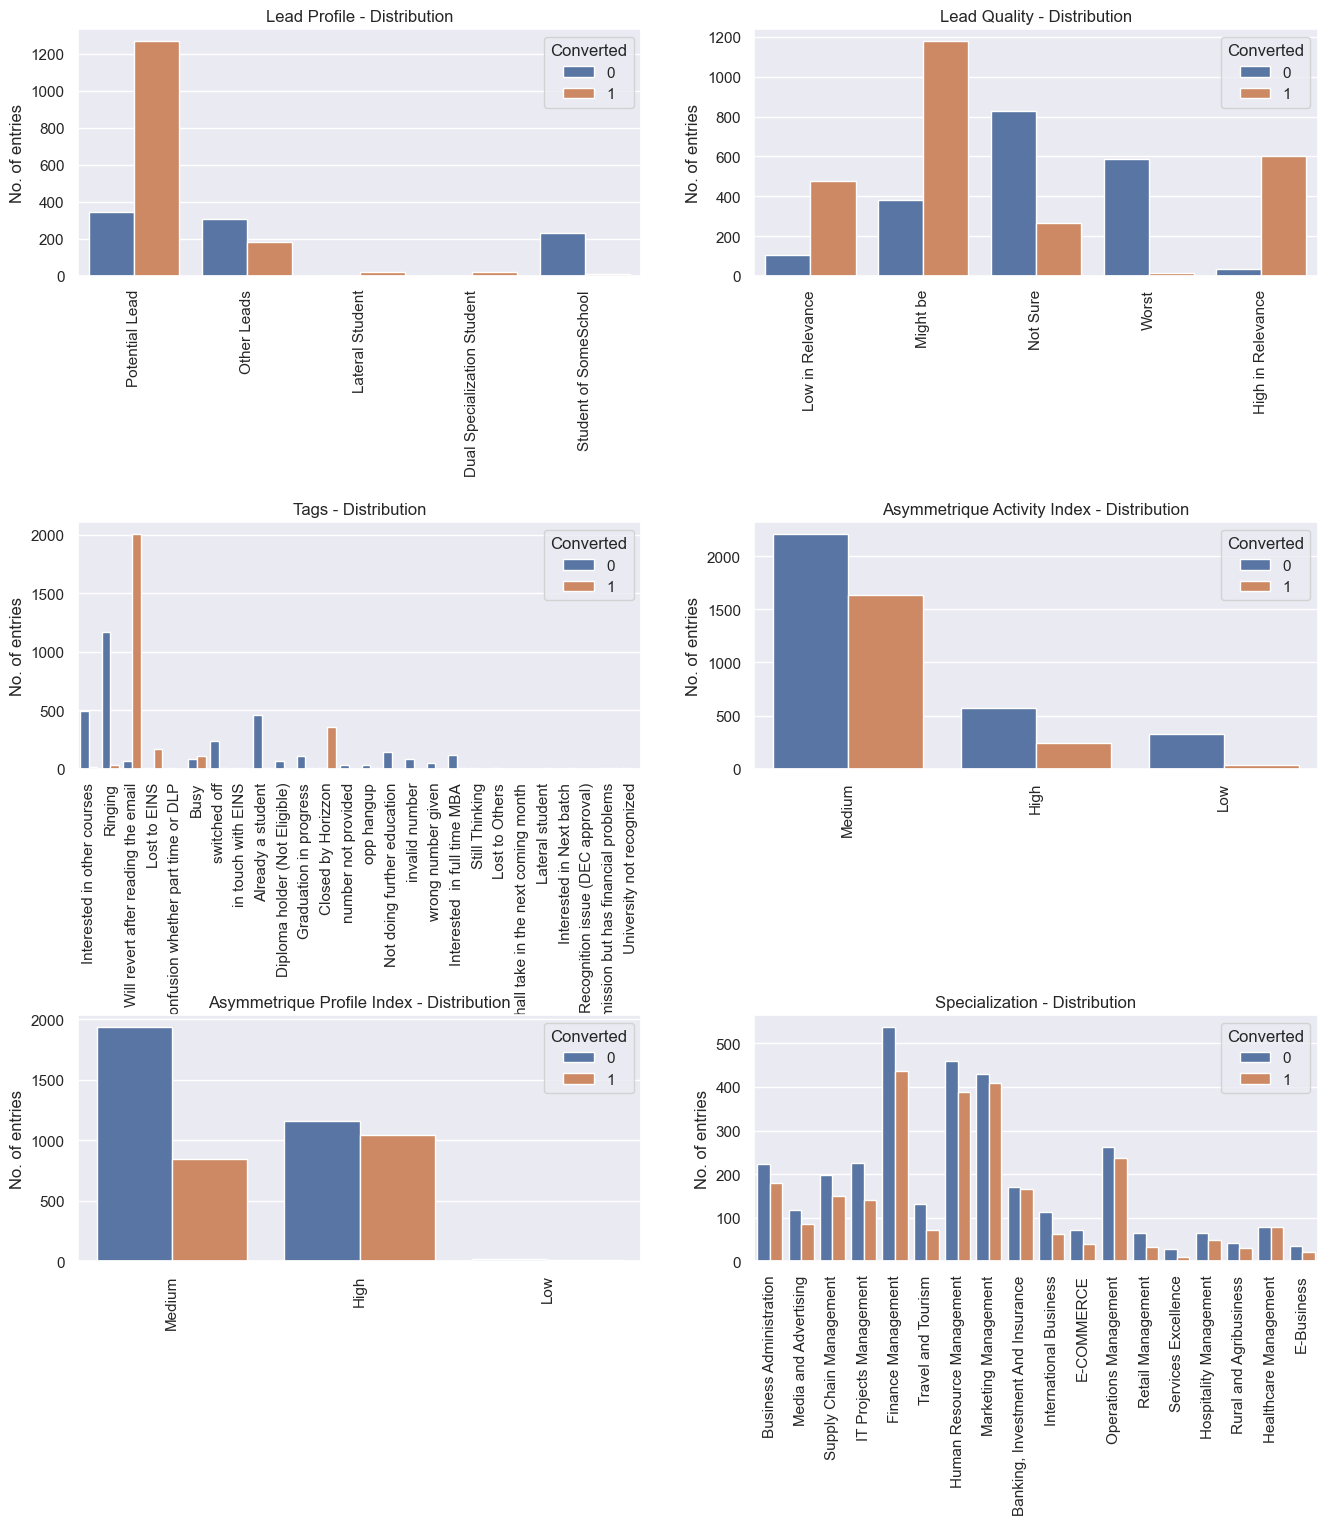

In [36]:
col_list_for_count4=['Lead Profile','Lead Quality','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Specialization']

# Visualising the histogram of the distribution of these categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count4)):
    plt.subplot(3, 2, i+1)
    var=col_list_for_count4[i]
    sns.countplot(x= var, hue = 'Converted', data = leads_df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 1)

### From the above graph, it is clear that the "Converted" output is heavily dependent on few specific values of "Tags","Lead Profile" and "Lead Quality".

In [37]:
# For Lead Profile, let's replace the NaN values with Unknown as value
leads_df['Lead Profile'].fillna(('Unknown'), inplace=True)

# For Lead Quality, let's replace the NaN values with Unknown as value
leads_df['Lead Quality'].fillna(('Unknown'), inplace=True) 

# For Tags, let's replace the NaN values with Unknown as value
leads_df['Tags'].fillna(('Unknown'), inplace=True)

In [38]:
# For Specialization, let's replace the NaN values with Unknown as value
leads_df['Specialization'].fillna(('Unknown'), inplace=True)

### Impute the Asymmetrique Index fields without causing any bias. Imputing is done using the same percentage distribution of the values in the column i.e. if say 25% of valid data has value "High", 25% of NaN will be updated as High and so on.

In [39]:
x_df=pd.DataFrame(leads_df['Asymmetrique Profile Index'].value_counts())
x_df.reset_index(inplace=True)
x_df.columns=['Asymmetrique Profile Index','count']
x_df
sums=x_df['count'].sum()
null_len=len(leads_df.loc[leads_df['Asymmetrique Profile Index'].isnull() == True])
i=0
j=0
for p,row in leads_df.loc[leads_df['Asymmetrique Profile Index'].isnull() == True].iterrows():
    leads_df.at[p,'Asymmetrique Profile Index']=x_df['Asymmetrique Profile Index'][i]
    j=j+1
    if round(j/null_len*100,2) >= round(x_df['count'][i]/sums*100,2):
        j=0
        i=i+1

In [40]:
x_df=pd.DataFrame(leads_df['Asymmetrique Activity Index'].value_counts())
x_df.reset_index(inplace=True)
x_df.columns=['Asymmetrique Activity Index','count']
x_df
sums=x_df['count'].sum()
null_len=len(leads_df.loc[leads_df['Asymmetrique Activity Index'].isnull() == True])
i=0
j=0
for p,row in leads_df.loc[leads_df['Asymmetrique Activity Index'].isnull() == True].iterrows():
    leads_df.at[p,'Asymmetrique Activity Index']=x_df['Asymmetrique Activity Index'][i]
    j=j+1
    if round(j/null_len*100,2) >= round(x_df['count'][i]/sums*100,2):
        j=0
        i=i+1

### Check the column distribution after changes

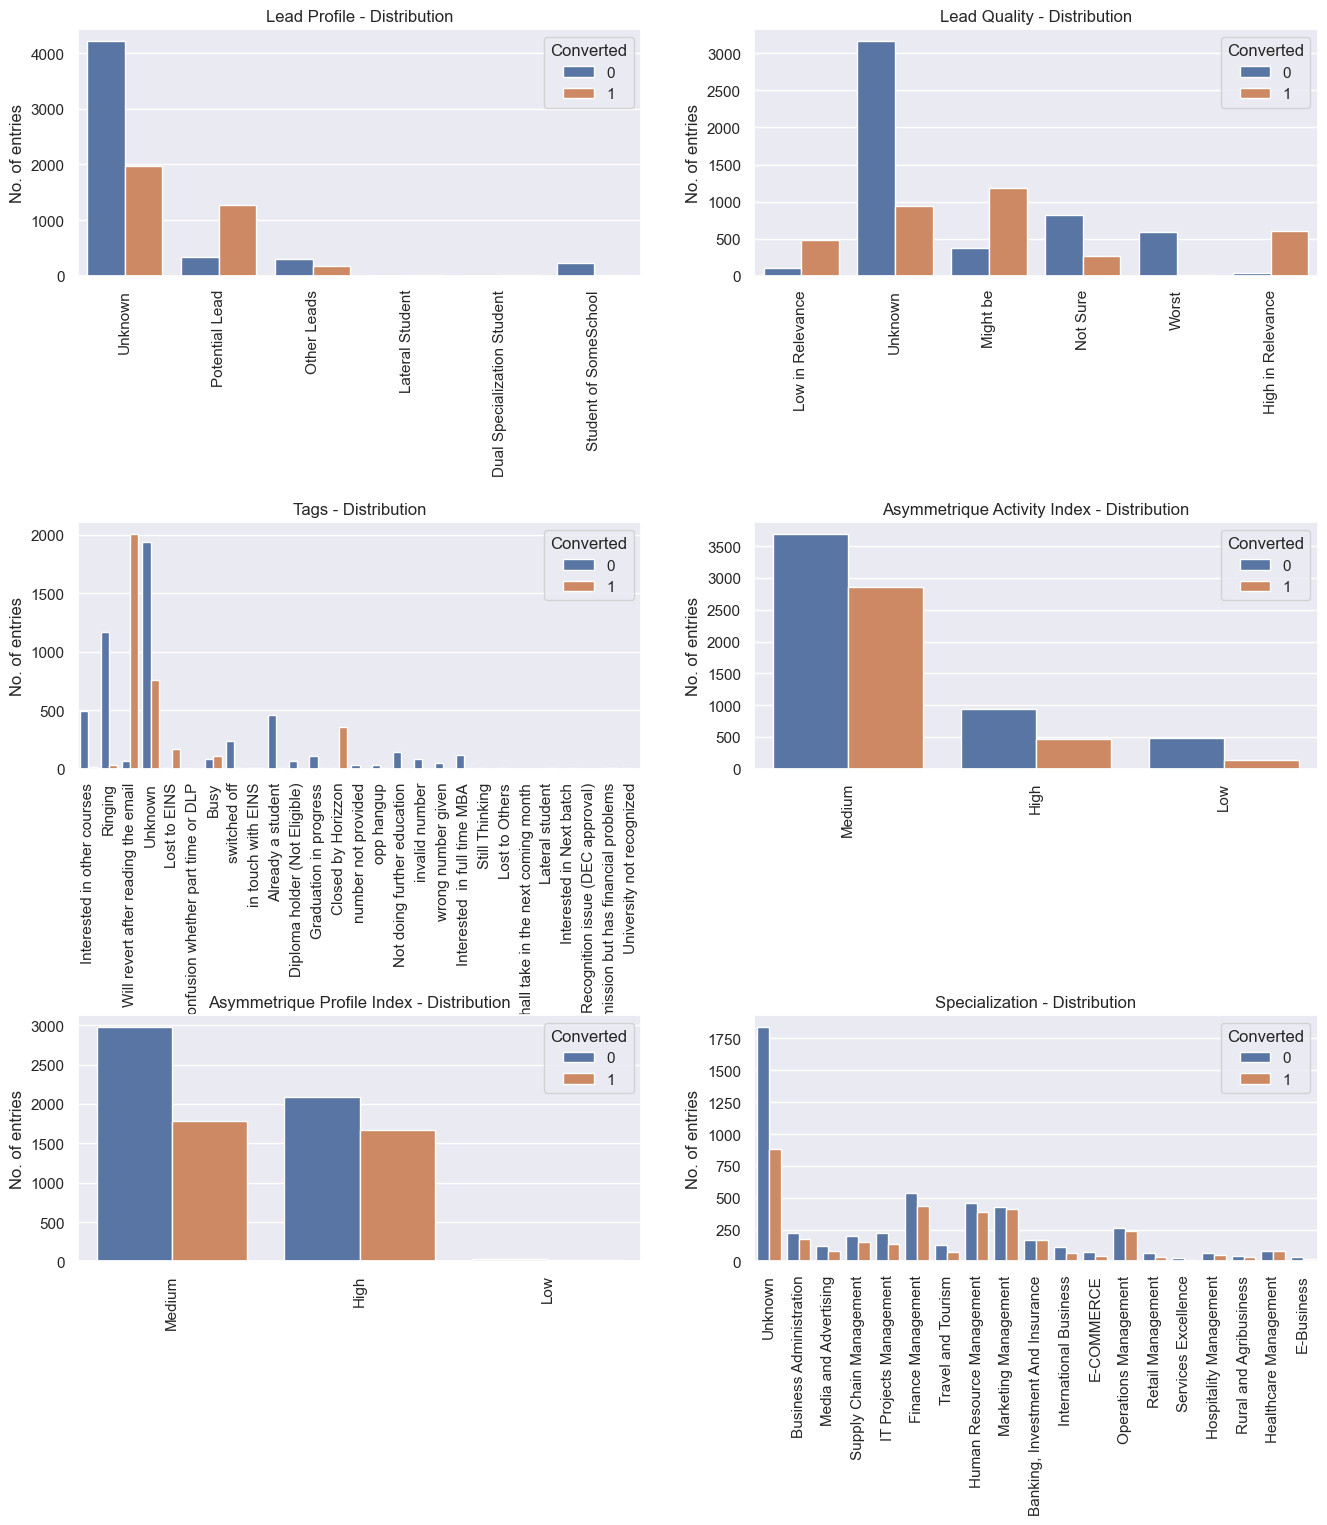

In [41]:
col_list_for_count4=['Lead Profile','Lead Quality','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Specialization']

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count4)):
    plt.subplot(3, 2, i+1)
    var=col_list_for_count4[i]
    #sns.countplot(leads_df[var])
    sns.countplot(x= var, hue = 'Converted', data = leads_df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 1)

### Check if any NULL fields are remaining

In [42]:
leads_null_fields=round((leads_df.isna().sum())/len(leads_df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Series([], dtype: float64)


In [43]:
leads_df.shape

(8576, 25)

### Check how the values are distributed in the remaining Non-NULL Categorical variables 

In [44]:
print(leads_df['Do Not Email'].value_counts())
print(leads_df['Do Not Call'].value_counts())
print(leads_df['Search'].value_counts())
print(leads_df['Newspaper Article'].value_counts())
print(leads_df['X Education Forums'].value_counts())
print(leads_df['Newspaper'].value_counts())
print(leads_df['Digital Advertisement'].value_counts())
print(leads_df['Through Recommendations'].value_counts())
print(leads_df['A free copy of Mastering The Interview'].value_counts())

No     7896
Yes     680
Name: Do Not Email, dtype: int64
No     8574
Yes       2
Name: Do Not Call, dtype: int64
No     8562
Yes      14
Name: Search, dtype: int64
No     8574
Yes       2
Name: Newspaper Article, dtype: int64
No     8575
Yes       1
Name: X Education Forums, dtype: int64
No     8575
Yes       1
Name: Newspaper, dtype: int64
No     8572
Yes       4
Name: Digital Advertisement, dtype: int64
No     8569
Yes       7
Name: Through Recommendations, dtype: int64
No     5694
Yes    2882
Name: A free copy of Mastering The Interview, dtype: int64


### Drop the columns that are heavily single-valued data. These data fields don't add much to the Model 

In [45]:
# Drop the column with heavily single-valued data. These data fields don't add much to the Model
leads_df=leads_df.drop('Do Not Call',axis=1)
leads_df=leads_df.drop('Search',axis=1)
leads_df=leads_df.drop('Newspaper Article',axis=1)
leads_df=leads_df.drop('X Education Forums',axis=1)
leads_df=leads_df.drop('Newspaper',axis=1)
leads_df=leads_df.drop('Digital Advertisement',axis=1)
leads_df=leads_df.drop('Through Recommendations',axis=1)

## Numerical Variable ananlysis


In [46]:
# List out the numerical variables that are part of the DataFrame
num_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
leads_df[num_vars].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8576.000000,8576.000000,8576.000000
mean,3.594216,509.471199,2.477975
std,4.916348,552.873572,2.139830
min,0.000000,0.000000,0.000000
25%,1.000000,34.000000,1.000000
50%,3.000000,268.000000,2.000000
75%,5.000000,972.000000,3.500000
max,251.000000,2272.000000,55.000000


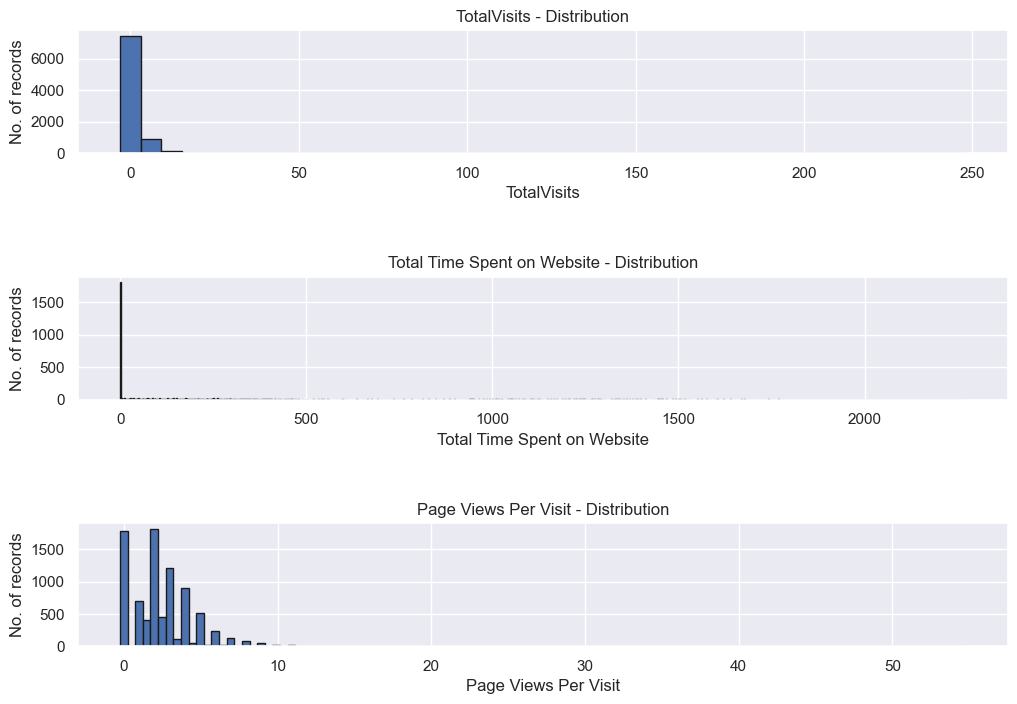

In [47]:
# Visualising the histogram of the distribution of all numeric variables
plt.figure(figsize=(12,8))
for i in range(len(num_vars)):
    plt.subplot(3,1, i+1)
    var=num_vars[i]
    leads_df[var].plot.hist(edgecolor = 'k',bins=(len(leads_df[var].unique())), align='left')
    plt.title(var+' - Distribution')
    plt.xlabel(var)
    plt.ylabel('No. of records')
    plt.subplots_adjust(hspace = 1)    

## The above graph indiactes a possible outliers in the data. Lets remove outliers.

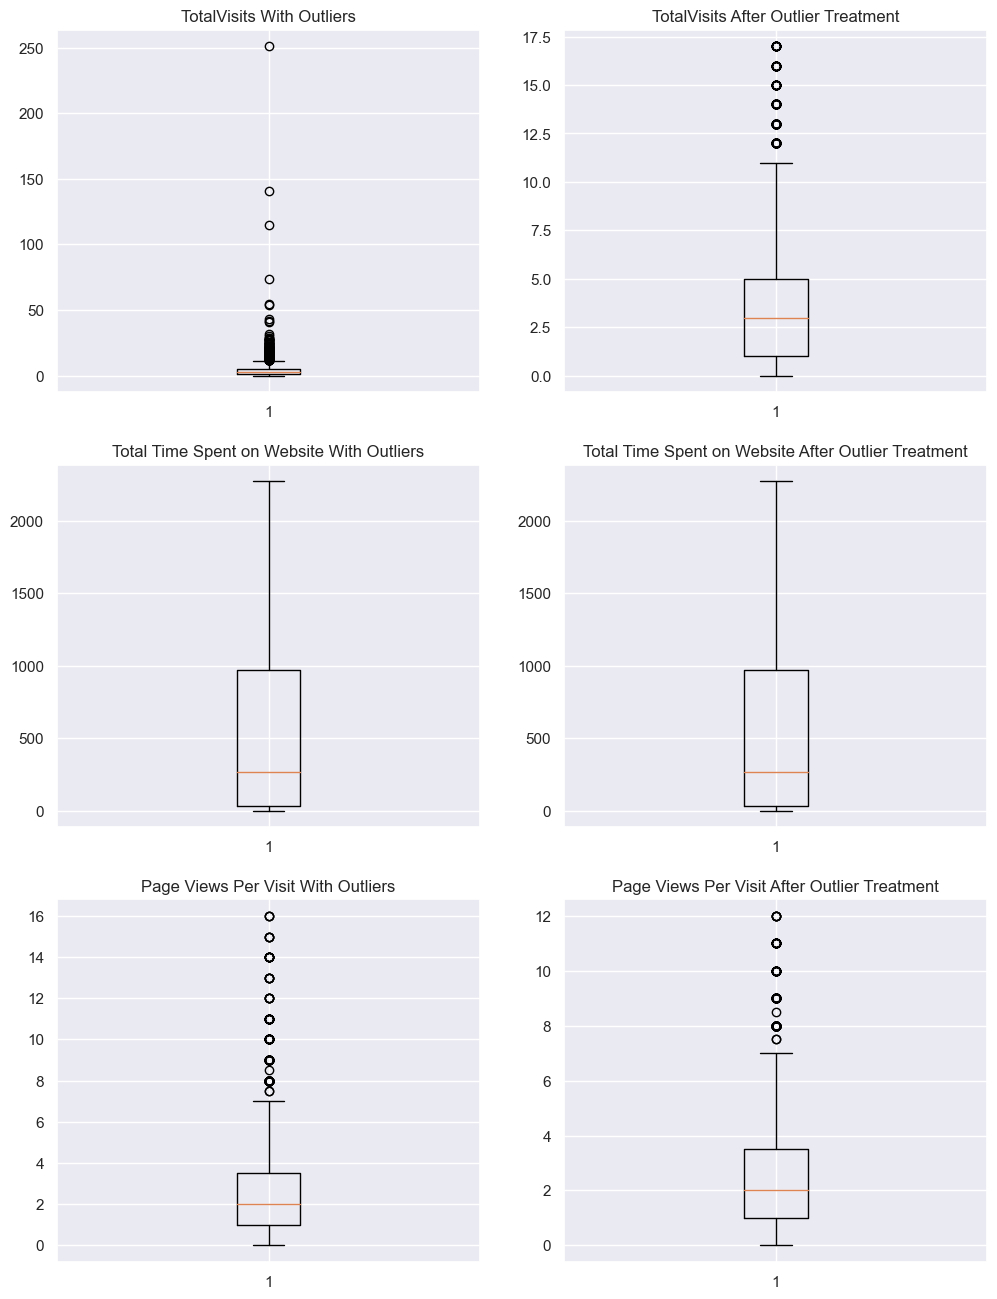

In [48]:
# Create a box plot of all the variables before and after Outlier treatment
plt.figure(figsize=(12,16))
pc_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
p=0
for j in range(len(pc_cols)):
    var=pc_cols[j]
    p=p+1
    plt.subplot(3, 2, p)
    plt.title(var+' With Outliers')
    plt.boxplot(leads_df[var])
    Q1 = leads_df[var].quantile(0.05)
    Q3 = leads_df[var].quantile(0.90)
    IQR = Q3 - Q1
    leads_df = leads_df[(leads_df[var] >= Q1 - 1.5*IQR) & (leads_df[var] <= Q3 + 1.5*IQR)]
    p=p+1
    plt.subplot(3, 2, p)
    plt.title(var+' After Outlier Treatment')
    plt.boxplot(leads_df[var])

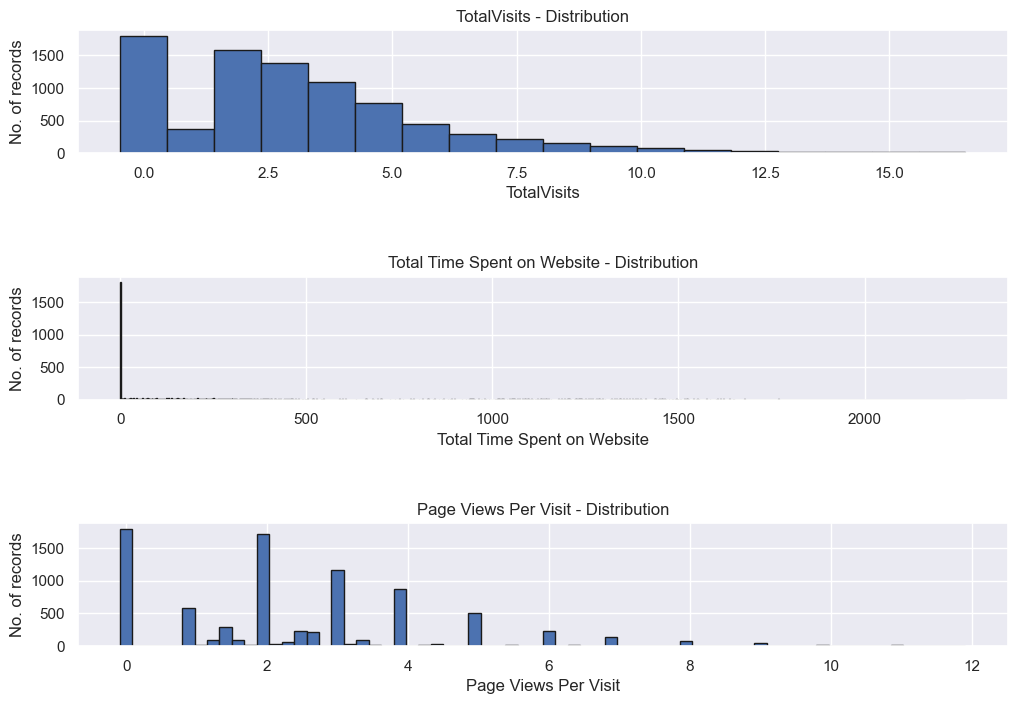

In [49]:
# Visualising the histogram of the distribution of all numeric variables after outlier treatment
plt.figure(figsize=(12,8))
for i in range(len(num_vars)):
    plt.subplot(3,1, i+1)
    var=num_vars[i]
    leads_df[var].plot.hist(edgecolor = 'k',bins=(len(leads_df[var].unique())), align='left')
    plt.title(var+' - Distribution')
    plt.xlabel(var)
    plt.ylabel('No. of records')
    plt.subplots_adjust(hspace = 1)    

Text(0, 0.5, 'No. of records')

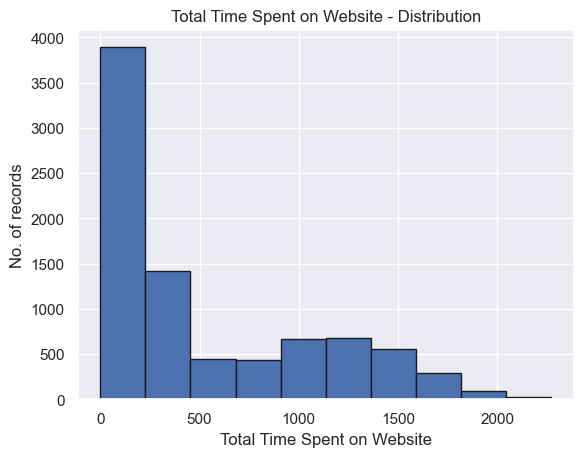

In [50]:
leads_df['Total Time Spent on Website'].plot.hist(edgecolor = 'k')
plt.title('Total Time Spent on Website - Distribution')
plt.xlabel('Total Time Spent on Website')
plt.ylabel('No. of records')

### <font color = blue>Generate the Heat map of the numerical data </font>

<Axes: >

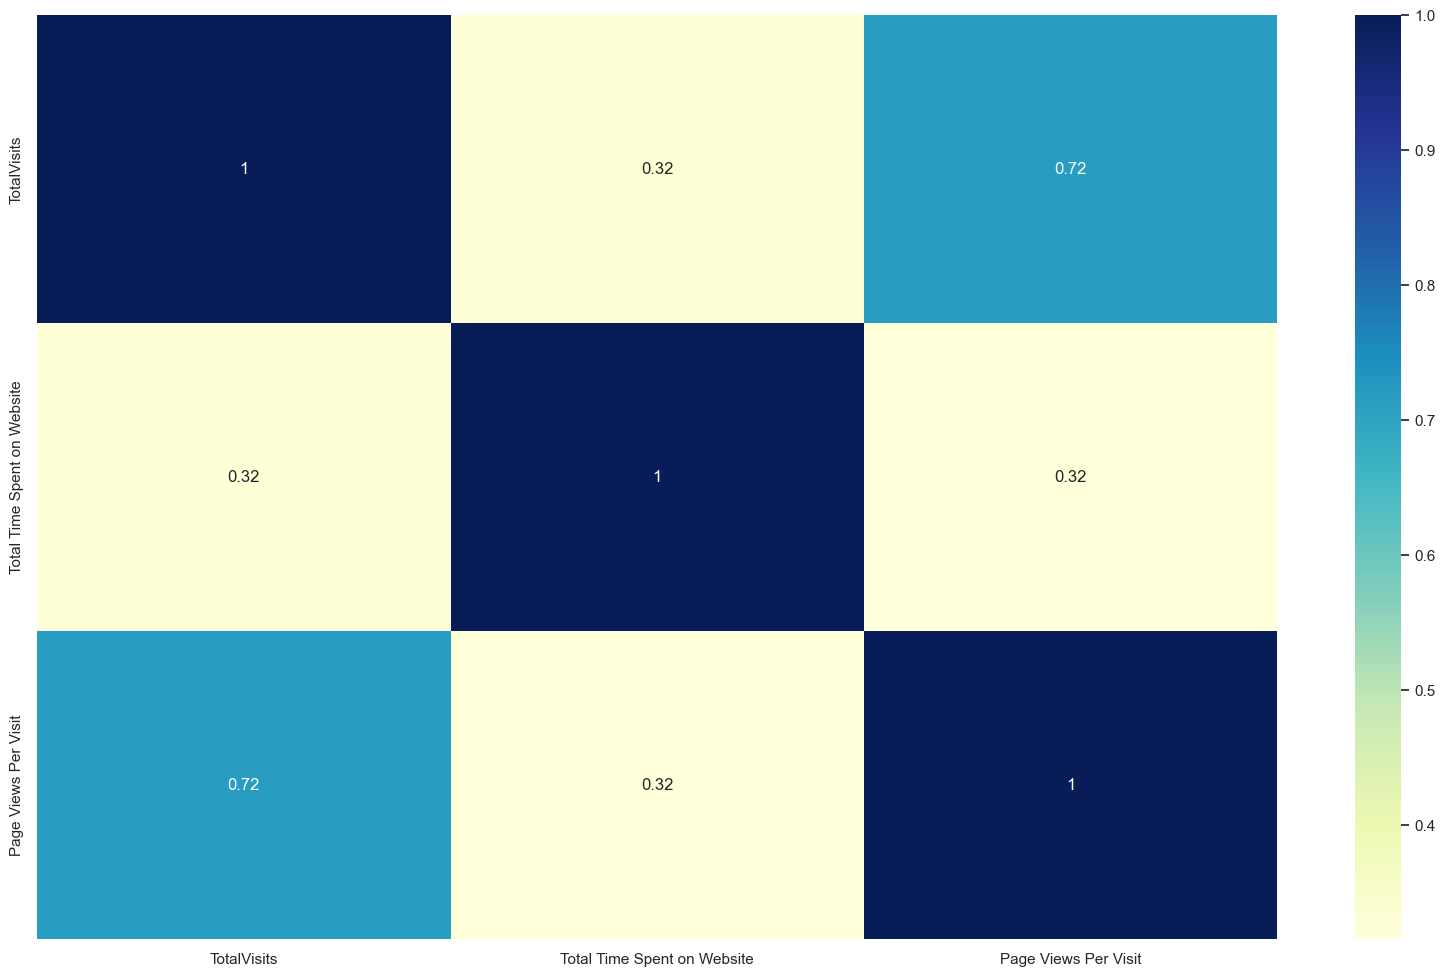

In [51]:
# Set the figure size
plt.figure(figsize=(20,12))

# Generate the heatmap
sns.heatmap(leads_df[pc_cols].corr(),cmap='YlGnBu', annot=True)

In [52]:
leads_df['Converted'].value_counts()

0    5041
1    3433
Name: Converted, dtype: int64

In [53]:
leads_df.shape

(8474, 18)

## <font color=blue>Part 1B : Encoding of Categorical variables</font>

In [54]:
print(leads_df['Do Not Email'].value_counts())
print(leads_df['A free copy of Mastering The Interview'].value_counts())

No     7813
Yes     661
Name: Do Not Email, dtype: int64
No     5656
Yes    2818
Name: A free copy of Mastering The Interview, dtype: int64


In [55]:
yes_no_list=['Do Not Email','A free copy of Mastering The Interview']

for var in yes_no_list:
    # Creating dummy variables for category variables
    dummy_df = pd.get_dummies(leads_df[var],prefix=var)
    leads_df = pd.concat([leads_df,dummy_df], axis=1)
    # Dropping the "Yes" entries as they are less in number
    leads_df.drop([var,var+'_Yes'], axis =1 , inplace=True)

leads_df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Last Notable Activity,Do Not Email_No,A free copy of Mastering The Interview_No
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Interested in other courses,Low in Relevance,Unknown,Medium,Medium,Modified,1,1
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Ringing,Unknown,Unknown,Medium,Medium,Email Opened,1,1
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Potential Lead,Medium,High,Email Opened,1,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Unknown,Medium,High,Modified,1,1
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,Will revert after reading the email,Might be,Unknown,Medium,High,Modified,1,1


###  <font color=blue>Check the values in the categorical variables and group the minor values into one single dummy value.</font>

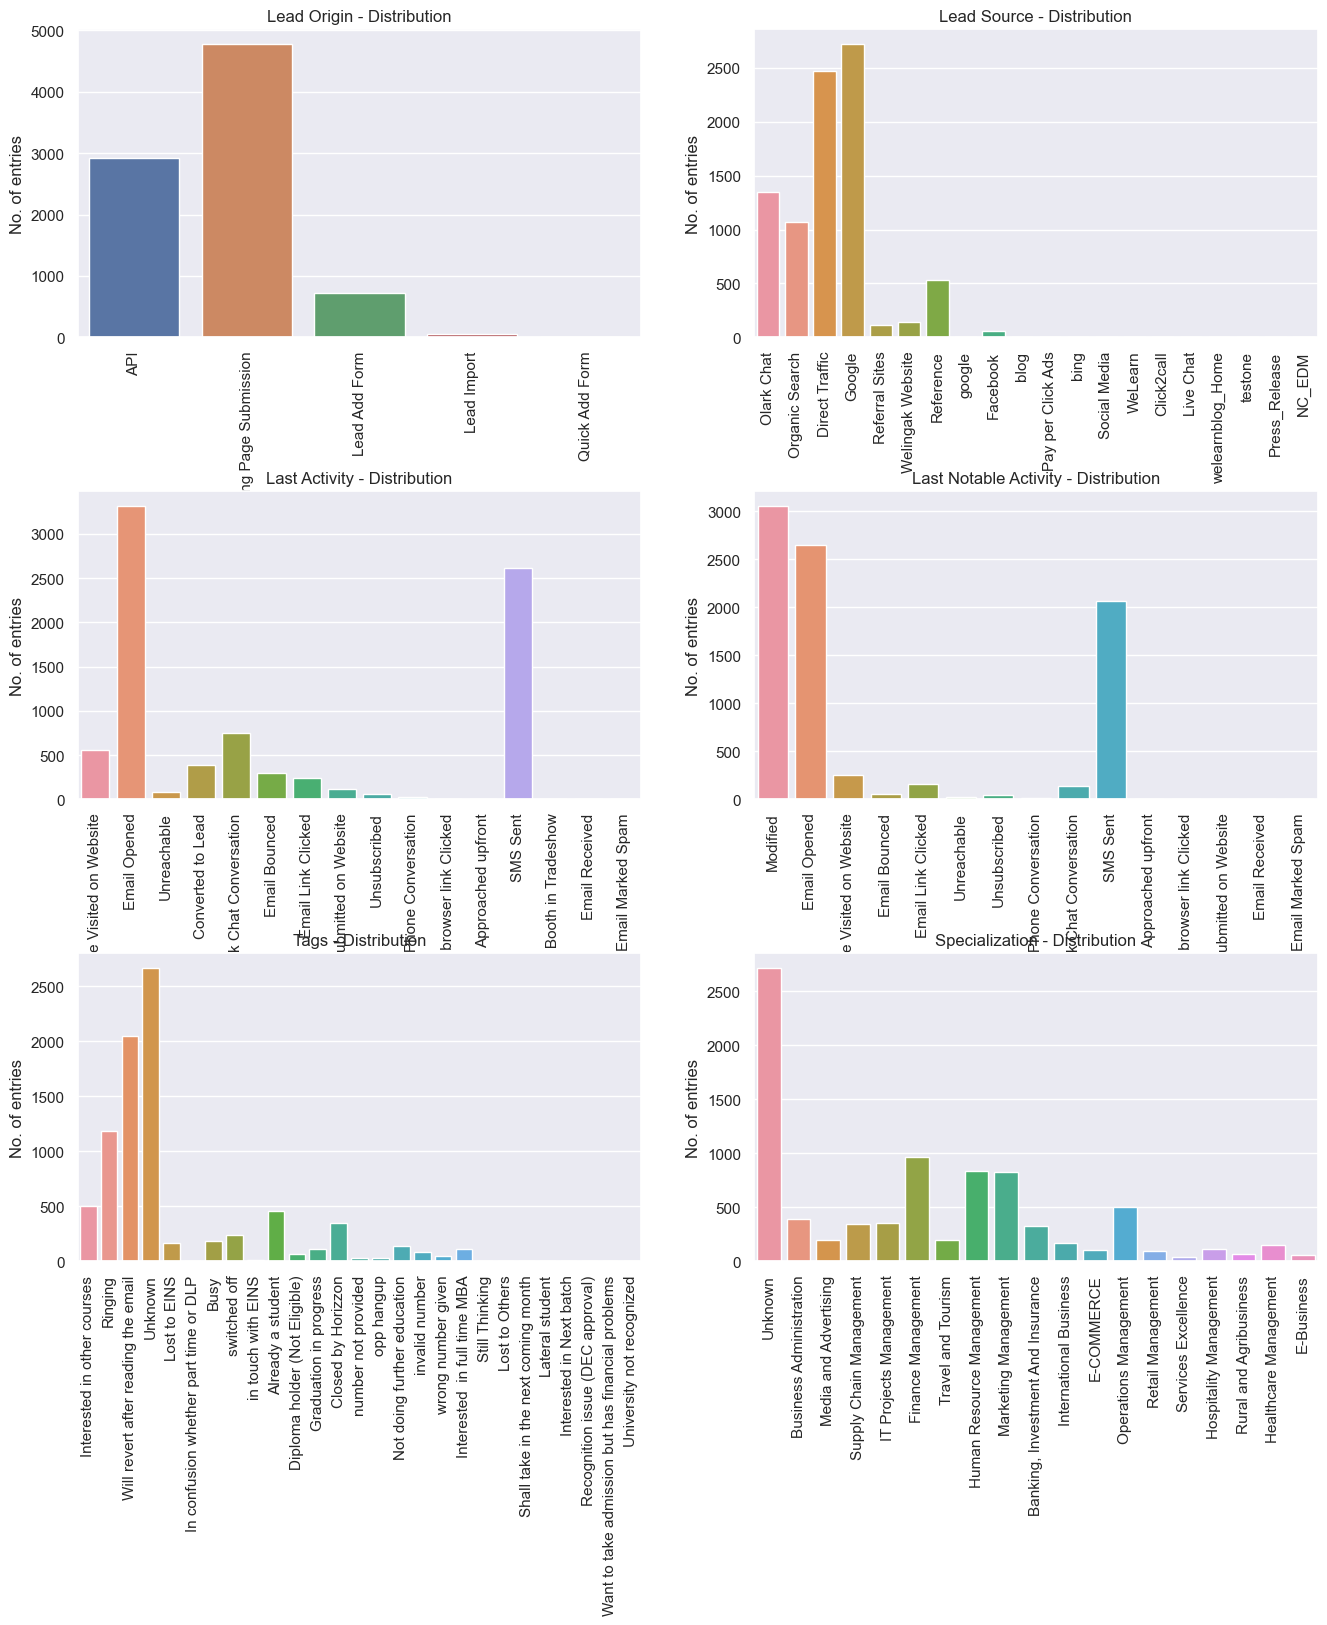

In [56]:
col_list_categ=['Lead Origin','Lead Source','Last Activity','Last Notable Activity','Tags','Specialization']

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_categ)):
    plt.subplot(3, 2, i+1)
    var=col_list_categ[i]
    sns.countplot(x=var, data=leads_df)
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)

In [57]:
print(leads_df['Tags'].value_counts())
print(leads_df['Specialization'].value_counts())

Unknown                                              2666
Will revert after reading the email                  2053
Ringing                                              1182
Interested in other courses                           506
Already a student                                     462
Closed by Horizzon                                    348
switched off                                          237
Busy                                                  185
Lost to EINS                                          169
Not doing further education                           138
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    27
in touch with 

In [58]:
##Group the minor values of these column into one single viz. Others
for p,row in leads_df.iterrows():
    if leads_df.at[p,'Lead Origin']== 'Quick Add Form':
        leads_df.at[p,'Lead Origin'] = 'Others'
    
    if leads_df.at[p,'Lead Source']== 'google':
        leads_df.at[p,'Lead Source'] = 'Google'
    elif leads_df.at[p,'Lead Source'] in (['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home','testone','Press_Release','NC_EDM']):
        leads_df.at[p,'Lead Source'] = 'Others'
    
    if leads_df.at[p,'Last Activity'] in (['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Visited Booth in Tradeshow']):
        leads_df.at[p,'Last Activity'] = 'Others'
    
    if leads_df.at[p,'Last Notable Activity'] in (['Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','View in browser link Clicked','Email Received','Form Submitted on Website']):
        leads_df.at[p,'Last Notable Activity'] = 'Others'
    
    if leads_df.at[p,'Tags'] in (['wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Want to take admission but has financial problems','Still Thinking','Interested in Next batch','In confusion whether part time or DLP','Lateral student','University not recognized','Shall take in the next coming month','Recognition issue (DEC approval)']):
        leads_df.at[p,'Tags'] = 'Others'
        
print(leads_df['Lead Origin'].value_counts())
print(leads_df['Lead Source'].value_counts())
print(leads_df['Last Activity'].value_counts())
print(leads_df['Last Notable Activity'].value_counts())
print(leads_df['Tags'].value_counts())

Landing Page Submission    4775
API                        2927
Lead Add Form               716
Lead Import                  55
Others                        1
Name: Lead Origin, dtype: int64
Google              2724
Direct Traffic      2471
Olark Chat          1345
Organic Search      1066
Reference            533
Welingak Website     142
Referral Sites       119
Facebook              55
Others                19
Name: Lead Source, dtype: int64
Email Opened                 3315
SMS Sent                     2610
Olark Chat Conversation       750
Page Visited on Website       557
Converted to Lead             389
Email Bounced                 301
Email Link Clicked            246
Form Submitted on Website     113
Unreachable                    89
Unsubscribed                   56
Others                         48
Name: Last Activity, dtype: int64
Modified                   3055
Email Opened               2651
SMS Sent                   2063
Page Visited on Website     259
Email Link Clic

In [59]:
#Create the dummy variables and drop the "Others" values
col_list_categ=['Lead Origin','Lead Source','Last Activity','Last Notable Activity']

for var in col_list_categ:
    # Creating dummy variables for category variables
    dummy_df = pd.get_dummies(leads_df[var],prefix=var)
    leads_df = pd.concat([leads_df,dummy_df], axis=1)
    # Dropping the Others entries as they are less in number
    leads_df.drop([var,var+'_Others'], axis =1 , inplace=True)

leads_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,660737,0,0.0,0,0.0,Unknown,Unemployed,Interested in other courses,Low in Relevance,Unknown,Medium,Medium,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,660728,0,5.0,674,2.5,Unknown,Unemployed,Ringing,Unknown,Unknown,Medium,Medium,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,660727,1,2.0,1532,2.0,Business Administration,Student,Will revert after reading the email,Might be,Potential Lead,Medium,High,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,660719,0,1.0,305,1.0,Media and Advertising,Unemployed,Ringing,Not Sure,Unknown,Medium,High,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,660681,1,2.0,1428,1.0,Unknown,Unemployed,Will revert after reading the email,Might be,Unknown,Medium,High,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [60]:
#Create the dummy variables and drop the "Unknown" and "Others" values
col_list_categ_2=['Specialization','What is your current occupation','Tags','Lead Quality','Lead Profile']

for var in col_list_categ_2:
    # Creating dummy variables for category variables
    dummy_df = pd.get_dummies(leads_df[var],prefix=var)
    leads_df = pd.concat([leads_df,dummy_df], axis=1)
    # Dropping the Others entries as they are less in number
    leads_df.drop([var,var+'_Unknown'], axis =1 , inplace=True)
    if var == 'Tags':
        leads_df.drop([var+'_Others'], axis =1 , inplace=True)
        

leads_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Asymmetrique Profile Index,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
0,660737,0,0.0,0,0.0,Medium,Medium,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,Medium,Medium,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,Medium,High,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,660719,0,1.0,305,1.0,Medium,High,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,Medium,High,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [61]:
# Dummy Variables for Index columns
col_list_categ_3=['Asymmetrique Activity Index','Asymmetrique Profile Index']

for var in col_list_categ_3:
    # Creating dummy variables for category variables
    dummy_df = pd.get_dummies(leads_df[var],prefix=var)
    leads_df = pd.concat([leads_df,dummy_df], axis=1)
    # Dropping the Others entries as they are less in number
    leads_df.drop([var,var+'_Low'], axis =1 , inplace=True)

leads_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
0,660737,0,0.0,0,0.0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,660728,0,5.0,674,2.5,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,660727,1,2.0,1532,2.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
3,660719,0,1.0,305,1.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
4,660681,1,2.0,1428,1.0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0


In [62]:
leads_df.shape

(8474, 88)

## <font color = blue> Part 1C. Test-Train Split </font>

In [63]:
# Drop the Lead Number, Converted fields to form the X features
X=leads_df.drop(['Lead Number','Converted'], axis =1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
0,0.0,0,0.0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,5.0,674,2.5,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,2.0,1532,2.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
3,1.0,305,1.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
4,2.0,1428,1.0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0


In [64]:
# Create the Y variable
y = leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### <font color = blue> Splitting the data into train and test </font>

In [65]:
# Split 70:30 into Training and Test Data
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [66]:
# Scale the numerical data to remove disparities in magnitude and scales of numerical variables
num_vars= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

scaler = StandardScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
4278,-0.454824,-0.101516,-0.226094,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1
5893,-0.454824,0.038946,-0.226094,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
380,-1.137752,-0.919072,-1.240916,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8976,-0.796288,-0.890260,-0.733505,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4197,-1.137752,-0.919072,-1.240916,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1


### <font color = blue> End of Test-Train Splitting & Scaling </font>

## <font color = blue>Part 1D: Model Building </font>

In [67]:
# Logistic Regression Model
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5845
Model Family:                Binomial   Df Model:                           85
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 16 Sep 2023   Deviance:                       36289.
Time:                        17:58:49   Pearson chi2:                 1.77e+18
No. Iterations:                    34   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 2.988e+15   7.32e+07   4.08e+07      0.000    2.99e+15    2.99e+15
TotalVisits                                           9.767e+13   1.39e+06   7.04e+07      0.000    9.77e+13    9.77e+13
Total Time Spent on Website                           3.849e+14   1.04e+06    3.7e+08      0.000    3.85e+14    3.85e+14
Page Views Per Visit                                 -3.977e+13   1.46e+06  -2.73e+07      0.000   -3.98e+13   -3.98e+13
Do Not Email_No                                       4.095e+14   4.73e+06   8.65e+07      0.000     4.1e+14     4.1e+14
A free copy of Mastering The Interview_No             2.314e+13   2.75e+06   8.41e+06      0.000    2.31e+13    2.31e+13
Lead Origin_API                                      -3.986e+15    6.8e+07  -5.86e+07      0.000   -3.99e+15   -3.99e+15
Lead Origin_Landing Page Submission                   -4.03e+15   6.79e+07  -5.93e+07      0.000   -4.03e+15   -4.03e+15
Lead Origin_Lead Add Form                             -4.11e+15   6.93e+07  -5.93e+07      0.000   -4.11e+15   -4.11e+15
Lead Origin_Lead Import                              -2.485e+15   3.57e+07  -6.97e+07      0.000   -2.49e+15   -2.49e+15
Lead Source_Direct Traffic                            -2.39e+14   1.88e+07  -1.27e+07      0.000   -2.39e+14   -2.39e+14
Lead Source_Facebook                                 -2.485e+15   3.57e+07  -6.97e+07      0.000   -2.49e+15   -2.49e+15
Lead Source_Google                                   -1.865e+14   1.87e+07  -9.97e+06      0.000   -1.87e+14   -1.87e+14
Lead Source_Olark Chat                                 3.67e+14    1.9e+07   1.93e+07      0.000    3.67e+14    3.67e+14
Lead Source_Organic Search                           -3.962e+14   1.89e+07   -2.1e+07      0.000   -3.96e+14   -3.96e+14
Lead Source_Reference                                -2.209e+14   2.04e+07  -1.08e+07      0.000   -2.21e+14   -2.21e+14
Lead Source_Referral Sites                           -5.363e+14   2.01e+07  -2.67e+07      0.000   -5.36e+14   -5.36e+14
Lead Source_Welingak Website                          3.414e+15   2.12e+07   1.61e+08      0.000    3.41e+15    3.41e+15
Last Activity_Converted to Lead                       2.252e+14   1.36e+07   1.66e+07      0.000    2.25e+14    2.25e+14
Last Activity_Email Bounced                           4.491e+14   1.44e+07   3.11e+07      0.000    4.49e+14    4.49e+14
Last Activity_Email Link Clicked                      4.659e+14   1.54e+07   3.02e+07      0.000    4.66e+14    4.66e+14
Last Activity_Email Opened                            5.455e+14    1.3e+07   4.18e+07      0.000    5.45e+14    5.45e+14
Last Activity_Form Submitted on Website               3.66

### <font color = blue> Implement RFE for Feature Elimination </font>

In [68]:
logreg = LogisticRegression()

# Create an RFE selector with the logistic regression model
rfe = RFE(logreg)

# Fit the RFE selector on the training data and specify the number of features to select
rfe.fit(X_train, y_train)

# Set the number of features to select (in this case, 15)
rfe.n_features_to_select = 15

# Get the selected features
selected_features = X_train.columns[rfe.support_]


In [69]:
rfe.support_

array([False,  True, False,  True, False, False,  True,  True, False,
       False,  True, False,  True, False,  True, False,  True,  True,
       False, False, False, False,  True, False,  True,  True, False,
       False,  True, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True, False,  True,  True,  True,
        True,  True,  True, False, False])

In [70]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 18),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Do Not Email_No', True, 1),
 ('A free copy of Mastering The Interview_No', False, 44),
 ('Lead Origin_API', False, 29),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 5),
 ('Lead Source_Direct Traffic', False, 9),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 13),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 10),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 8),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', False, 28),
 ('Last Activity_Email Link Clicked', False, 37),
 ('Last Activity_Email Opened', False, 24),
 ('Last Activity_Form Submitted on Website', False, 7),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Pa

### <font color = blue> Get the list of RFE selected columns </font>

In [71]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Do Not Email_No',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Specialization_Retail Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       

In [72]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview_No', 'Lead Origin_API',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unsubscribed',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unsubscribed',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Managem

###  Build the model from RFE selected columns 

### Model 1

In [73]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5887
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1007.0
Date:                Sat, 16 Sep 2023   Deviance:                       2014.1
Time:                        17:58:56   Pearson chi2:                 8.11e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6370
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.0875      0.411     -9.947      0.000      -4.893      -3.282
Total Time Spent on Website                              1.0185      0.067     15.239      0.000       0.887       1.149
Do Not Email_No                                          1.1861      0.271      4.383      0.000       0.656       1.716
Lead Origin_Landing Page Submission                     -0.5133      0.161     -3.197      0.001      -0.828      -0.199
Lead Origin_Lead Add Form                                0.5856      0.822      0.713      0.476      -1.025       2.196
Lead Source_Facebook                                    -0.9287      0.747     -1.243      0.214      -2.393       0.536
Lead Source_Olark Chat                                   1.0308      0.204      5.048      0.000       0.631       1.431
Lead Source_Reference                                   -0.6121      0.898     -0.682      0.495      -2.372       1.147
Lead Source_Welingak Website                             4.3296      1.300      3.331      0.001       1.782       6.877
Last Activity_Converted to Lead                         -0.5488      0.447     -1.229      0.219      -1.424       0.327
Last Activity_Olark Chat Conversation                   -0.4830      0.347     -1.390      0.165      -1.164       0.198
Last Activity_SMS Sent                                   1.2662      0.277      4.565      0.000       0.723       1.810
Last Activity_Unreachable                                1.0472      0.749      1.399      0.162      -0.420       2.515
Last Notable Activity_Email Link Clicked                -1.0403      0.412     -2.522      0.012      -1.849      -0.232
Last Notable Activity_Modified                          -1.3164      0.213     -6.188      0.000      -1.733      -0.899
Last Notable Activity_Olark Chat Conversation           -1.4786      0.591     -2.502      0.012      -2.637      -0.320
Last Notable Activity_SMS Sent                           0.6699      0.314      2.134      0.033       0.055       1.285
Specialization_Retail Management                        -0.6555      0.561     -1.169      0.242      -1.755       0.444
Specialization_Travel and Tourism                       -0.9858      0.449     -2.197      0.028      -1.865      -0.106
What is your current occupation_Housewife               23.0316   4.44e+04      0.001      1.000    -8.7e+04    8.71e+04
What is your current occupation_Other                    1.7872      1.345      1.329      0.184      -0.848       4.423
What is your current occupation_Student                  1.6928      0.589      2.876      0.004       0.539       2.846
What is your current occupation_Unemployed               1

###  <font color = blue> Check Multicollinearity using Variance Inflation Factor </font>

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,19.43
6,Lead Source_Reference,15.33
1,Do Not Email_No,9.68
42,Asymmetrique Activity Index_Medium,8.81
21,What is your current occupation_Unemployed,8.03
15,Last Notable Activity_SMS Sent,7.20
10,Last Activity_SMS Sent,6.93
7,Lead Source_Welingak Website,4.83
32,Tags_Will revert after reading the email,3.91
2,Lead Origin_Landing Page Submission,3.84


###  <font color = blue>Drop the column with high p-value as this is insignificant</font>

In [75]:
col=col.drop('What is your current occupation_Housewife',1)

col

Index(['Total Time Spent on Website', 'Do Not Email_No',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Specialization_Retail Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduati

### Model 2

In [76]:
X_train_sm = sm.add_constant(X_train[col])
logm3=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5888
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1008.3
Date:                Sat, 16 Sep 2023   Deviance:                       2016.6
Time:                        17:58:58   Pearson chi2:                 8.15e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6369
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.0768      0.411     -9.917      0.000      -4.883      -3.271
Total Time Spent on Website                              1.0183      0.067     15.244      0.000       0.887       1.149
Do Not Email_No                                          1.1804      0.271      4.359      0.000       0.650       1.711
Lead Origin_Landing Page Submission                     -0.5161      0.160     -3.216      0.001      -0.831      -0.202
Lead Origin_Lead Add Form                                0.5858      0.822      0.712      0.476      -1.026       2.198
Lead Source_Facebook                                    -0.9240      0.748     -1.235      0.217      -2.390       0.543
Lead Source_Olark Chat                                   1.0312      0.204      5.054      0.000       0.631       1.431
Lead Source_Reference                                   -0.5558      0.899     -0.618      0.536      -2.318       1.206
Lead Source_Welingak Website                             4.3388      1.300      3.337      0.001       1.790       6.887
Last Activity_Converted to Lead                         -0.5628      0.447     -1.260      0.208      -1.438       0.313
Last Activity_Olark Chat Conversation                   -0.4919      0.347     -1.416      0.157      -1.173       0.189
Last Activity_SMS Sent                                   1.2547      0.277      4.525      0.000       0.711       1.798
Last Activity_Unreachable                                1.0397      0.750      1.387      0.166      -0.430       2.509
Last Notable Activity_Email Link Clicked                -0.9735      0.403     -2.418      0.016      -1.762      -0.185
Last Notable Activity_Modified                          -1.3082      0.212     -6.157      0.000      -1.725      -0.892
Last Notable Activity_Olark Chat Conversation           -1.4648      0.591     -2.478      0.013      -2.623      -0.306
Last Notable Activity_SMS Sent                           0.6837      0.314      2.178      0.029       0.068       1.299
Specialization_Retail Management                        -0.6492      0.559     -1.160      0.246      -1.746       0.447
Specialization_Travel and Tourism                       -0.9929      0.449     -2.209      0.027      -1.874      -0.112
What is your current occupation_Other                    1.6962      1.341      1.265      0.206      -0.932       4.324
What is your current occupation_Student                  1.6333      0.590      2.767      0.006       0.476       2.790
What is your current occupation_Unemployed               1.7432      0.147     11.896      0.000       1.456       2.030
What is your current occupation_Working Professional     2

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,19.43
6,Lead Source_Reference,15.33
1,Do Not Email_No,9.68
41,Asymmetrique Activity Index_Medium,8.81
20,What is your current occupation_Unemployed,7.92
15,Last Notable Activity_SMS Sent,7.19
10,Last Activity_SMS Sent,6.92
7,Lead Source_Welingak Website,4.83
31,Tags_Will revert after reading the email,3.88
2,Lead Origin_Landing Page Submission,3.84


In [78]:
col=col.drop('Tags_invalid number',1)

col

Index(['Total Time Spent on Website', 'Do Not Email_No',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Specialization_Retail Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduati

# Model 3

In [79]:
X_train_sm = sm.add_constant(X_train[col])
logm4=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5889
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1034.8
Date:                Sat, 16 Sep 2023   Deviance:                       2069.7
Time:                        17:59:00   Pearson chi2:                 8.32e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6336
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9003      0.406     -9.603      0.000      -4.696      -3.104
Total Time Spent on Website                              1.0410      0.066     15.810      0.000       0.912       1.170
Do Not Email_No                                          1.1245      0.268      4.203      0.000       0.600       1.649
Lead Origin_Landing Page Submission                     -0.5831      0.158     -3.700      0.000      -0.892      -0.274
Lead Origin_Lead Add Form                                0.6602      0.825      0.800      0.424      -0.957       2.277
Lead Source_Facebook                                    -0.8664      0.756     -1.146      0.252      -2.348       0.615
Lead Source_Olark Chat                                   1.0712      0.201      5.328      0.000       0.677       1.465
Lead Source_Reference                                   -0.6247      0.902     -0.692      0.489      -2.393       1.144
Lead Source_Welingak Website                             4.4062      1.302      3.385      0.001       1.855       6.957
Last Activity_Converted to Lead                         -0.5862      0.440     -1.331      0.183      -1.449       0.277
Last Activity_Olark Chat Conversation                   -0.4936      0.347     -1.421      0.155      -1.174       0.187
Last Activity_SMS Sent                                   1.2689      0.276      4.600      0.000       0.728       1.810
Last Activity_Unreachable                                1.0699      0.749      1.428      0.153      -0.398       2.538
Last Notable Activity_Email Link Clicked                -0.9435      0.404     -2.335      0.020      -1.735      -0.152
Last Notable Activity_Modified                          -1.3195      0.211     -6.241      0.000      -1.734      -0.905
Last Notable Activity_Olark Chat Conversation           -1.4705      0.588     -2.500      0.012      -2.623      -0.318
Last Notable Activity_SMS Sent                           0.6063      0.311      1.952      0.051      -0.003       1.215
Specialization_Retail Management                        -0.5498      0.557     -0.988      0.323      -1.641       0.541
Specialization_Travel and Tourism                       -1.0217      0.434     -2.353      0.019      -1.873      -0.171
What is your current occupation_Other                    1.5400      1.339      1.150      0.250      -1.085       4.165
What is your current occupation_Student                  1.4998      0.598      2.508      0.012       0.328       2.672
What is your current occupation_Unemployed               1.5699      0.143     10.987      0.000       1.290       1.850
What is your current occupation_Working Professional     1

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,19.43
6,Lead Source_Reference,15.33
1,Do Not Email_No,9.68
40,Asymmetrique Activity Index_Medium,8.81
20,What is your current occupation_Unemployed,7.52
15,Last Notable Activity_SMS Sent,7.19
10,Last Activity_SMS Sent,6.92
7,Lead Source_Welingak Website,4.83
2,Lead Origin_Landing Page Submission,3.83
31,Tags_Will revert after reading the email,3.74


In [81]:
col=col.drop('Lead Origin_Lead Add Form',1)

col

Index(['Total Time Spent on Website', 'Do Not Email_No',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Specialization_Retail Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_Intere

# Model 4

In [82]:
X_train_sm = sm.add_constant(X_train[col])
logm5=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res=logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5890
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1035.2
Date:                Sat, 16 Sep 2023   Deviance:                       2070.4
Time:                        17:59:02   Pearson chi2:                 8.33e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6336
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.8638      0.402     -9.606      0.000      -4.652      -3.075
Total Time Spent on Website                              1.0396      0.066     15.794      0.000       0.911       1.169
Do Not Email_No                                          1.0947      0.263      4.155      0.000       0.578       1.611
Lead Origin_Landing Page Submission                     -0.5997      0.156     -3.840      0.000      -0.906      -0.294
Lead Source_Facebook                                    -0.8847      0.756     -1.170      0.242      -2.367       0.598
Lead Source_Olark Chat                                   1.0582      0.200      5.286      0.000       0.666       1.451
Lead Source_Reference                                    0.0135      0.414      0.033      0.974      -0.799       0.826
Lead Source_Welingak Website                             5.0430      1.028      4.904      0.000       3.027       7.059
Last Activity_Converted to Lead                         -0.5939      0.441     -1.347      0.178      -1.458       0.270
Last Activity_Olark Chat Conversation                   -0.5005      0.348     -1.440      0.150      -1.182       0.181
Last Activity_SMS Sent                                   1.2646      0.276      4.586      0.000       0.724       1.805
Last Activity_Unreachable                                1.0665      0.750      1.422      0.155      -0.404       2.537
Last Notable Activity_Email Link Clicked                -0.9455      0.404     -2.338      0.019      -1.738      -0.153
Last Notable Activity_Modified                          -1.3174      0.211     -6.234      0.000      -1.732      -0.903
Last Notable Activity_Olark Chat Conversation           -1.4678      0.589     -2.494      0.013      -2.621      -0.314
Last Notable Activity_SMS Sent                           0.6124      0.311      1.972      0.049       0.004       1.221
Specialization_Retail Management                        -0.5495      0.557     -0.987      0.324      -1.641       0.542
Specialization_Travel and Tourism                       -1.0263      0.435     -2.362      0.018      -1.878      -0.175
What is your current occupation_Other                    1.5395      1.339      1.150      0.250      -1.084       4.163
What is your current occupation_Student                  1.4971      0.598      2.504      0.012       0.325       2.669
What is your current occupation_Unemployed               1.5743      0.143     11.031      0.000       1.295       1.854
What is your current occupation_Working Professional     1.9700      0.374      5.267      0.000       1.237       2.703
Tags_Already a student                                  -4

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Do Not Email_No,9.68
39,Asymmetrique Activity Index_Medium,8.76
19,What is your current occupation_Unemployed,7.50
14,Last Notable Activity_SMS Sent,7.19
9,Last Activity_SMS Sent,6.92
2,Lead Origin_Landing Page Submission,3.78
30,Tags_Will revert after reading the email,3.73
12,Last Notable Activity_Modified,3.16
38,Asymmetrique Activity Index_High,2.76
21,Tags_Already a student,2.53


In [84]:
col=col.drop('Last Activity_SMS Sent',1)

col

Index(['Total Time Spent on Website', 'Do Not Email_No',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Unreachable',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Specialization_Retail Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', '

# Model 5

In [85]:
X_train_sm = sm.add_constant(X_train[col])
logm6=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res=logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5891
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1045.7
Date:                Sat, 16 Sep 2023   Deviance:                       2091.5
Time:                        17:59:04   Pearson chi2:                 8.09e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6323
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9500      0.399     -9.907      0.000      -4.731      -3.168
Total Time Spent on Website                              1.0414      0.066     15.841      0.000       0.913       1.170
Do Not Email_No                                          1.1649      0.261      4.470      0.000       0.654       1.676
Lead Origin_Landing Page Submission                     -0.5887      0.155     -3.793      0.000      -0.893      -0.285
Lead Source_Facebook                                    -0.8213      0.789     -1.041      0.298      -2.367       0.724
Lead Source_Olark Chat                                   1.0427      0.199      5.249      0.000       0.653       1.432
Lead Source_Reference                                    0.1181      0.411      0.288      0.774      -0.687       0.923
Lead Source_Welingak Website                             5.1297      1.035      4.954      0.000       3.100       7.159
Last Activity_Converted to Lead                         -1.0919      0.421     -2.591      0.010      -1.918      -0.266
Last Activity_Olark Chat Conversation                   -1.0019      0.322     -3.107      0.002      -1.634      -0.370
Last Activity_Unreachable                                0.7658      0.726      1.055      0.292      -0.657       2.189
Last Notable Activity_Email Link Clicked                -0.9258      0.401     -2.306      0.021      -1.713      -0.139
Last Notable Activity_Modified                          -0.7832      0.166     -4.722      0.000      -1.108      -0.458
Last Notable Activity_Olark Chat Conversation           -0.9461      0.572     -1.655      0.098      -2.067       0.175
Last Notable Activity_SMS Sent                           1.8643      0.150     12.388      0.000       1.569       2.159
Specialization_Retail Management                        -0.4030      0.546     -0.737      0.461      -1.474       0.668
Specialization_Travel and Tourism                       -1.0352      0.438     -2.365      0.018      -1.893      -0.177
What is your current occupation_Other                    1.1445      1.300      0.881      0.379      -1.403       3.692
What is your current occupation_Student                  1.4002      0.586      2.389      0.017       0.251       2.549
What is your current occupation_Unemployed               1.5563      0.142     10.973      0.000       1.278       1.834
What is your current occupation_Working Professional     1.9790      0.372      5.321      0.000       1.250       2.708
Tags_Already a student                                  -4.0948      1.022     -4.006      0.000      -6.098      -2.092
Tags_Closed by Horizzon                                  6

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Do Not Email_No,9.58
38,Asymmetrique Activity Index_Medium,8.76
18,What is your current occupation_Unemployed,7.49
2,Lead Origin_Landing Page Submission,3.78
29,Tags_Will revert after reading the email,3.73
37,Asymmetrique Activity Index_High,2.75
11,Last Notable Activity_Modified,2.53
20,Tags_Already a student,2.53
32,Lead Quality_Worst,2.36
19,What is your current occupation_Working Profes...,2.32


### Now that the Logistic Regression model 5 has been built with all near-ZERO p-values and low VIF (multi-collinearity), lets go ahead with predicting on Training data itself. 

In [87]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [88]:
y_train_pred[:10]

array([9.54038358e-01, 7.98693835e-03, 3.04121131e-02, 1.16549355e-01,
       9.86969405e-01, 5.74362384e-03, 2.59598076e-02, 9.93900616e-01,
       4.31776555e-05, 7.07204467e-01])

In [89]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Index'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index
0,1,0.954038,4278
1,0,0.007987,5893
2,0,0.030412,380
3,0,0.116549,8976
4,1,0.986969,4197


### <font color = blue> Add Prediction and % Conversion Probability using 0.5 as threshold</font>

In [90]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Conversion_Prob%'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100,2))

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index,predicted,Conversion_Prob%
0,1,0.954038,4278,1,95.40
1,0,0.007987,5893,0,0.80
2,0,0.030412,380,0,3.04
3,0,0.116549,8976,0,11.65
4,1,0.986969,4197,1,98.70


# Model Evalution 

### Create the Confusion Matrix

In [91]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3352  153]
 [ 253 2173]]


In [92]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.9315461136401956


In [93]:
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

In [94]:
# SENSITIVITY
print("Sensitivity:",round(100*(TP/float(FN+TP)),2),"%")

Sensitivity: 89.57 %


In [95]:
# SPECIFICITY
print("Specificity:",round(100*(TN/float(TN+FP)),2),"%")

Specificity: 95.63 %


In [96]:
# FALSE POSITIVE RATE
print("FPR:",round(100*(FP/float(FP+TN)),2),"%")

FPR: 4.37 %


In [97]:
# FALSE NEGATIVE RATE
print("FPR:",round(100*(FN/float(FN+TP)),2),"%")

FPR: 10.43 %


In [98]:
# positive predictive value
print("Positive Predictive Power:",round(100*(TP/float(TP+FP)),2),"%")

Positive Predictive Power: 93.42 %


In [99]:
# negative predictive value
print("Negative Predictive Power:",round(100*(TN/float(TN+FN)),2),"%")

Negative Predictive Power: 92.98 %


In [100]:
# ACCURACY SCORE
print("ACCURACY SCORE:",round(100*((TP+TN)/(TP+TN+FP+FN)),2),"%")

ACCURACY SCORE: 93.15 %


## <font color = blue> Part 1E. ROC Curve </font>

In [101]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [102]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

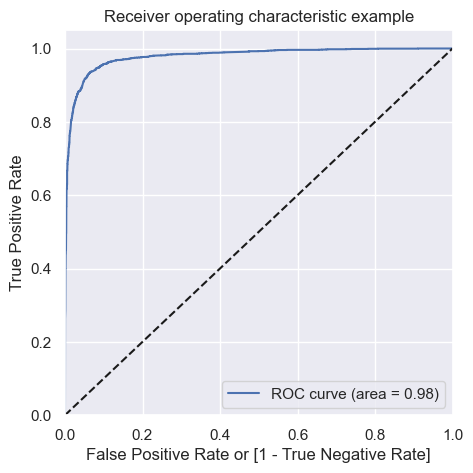

In [103]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### <font color = blue> The MODEL has Area Under Curve (AUC) value of 0.98, which is a very good indicator </font>

In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index,predicted,Conversion_Prob%,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.954038,4278,1,95.40,1,1,1,1,1,1,1,1,1,1
1,0,0.007987,5893,0,0.80,1,0,0,0,0,0,0,0,0,0
2,0,0.030412,380,0,3.04,1,0,0,0,0,0,0,0,0,0
3,0,0.116549,8976,0,11.65,1,1,0,0,0,0,0,0,0,0
4,1,0.986969,4197,1,98.70,1,1,1,1,1,1,1,1,1,1


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.409037  1.000000  0.000000
0.1   0.1  0.876581  0.975680  0.807989
0.2   0.2  0.918395  0.961665  0.888445
0.3   0.3  0.929691  0.941055  0.921826
0.4   0.4  0.934581  0.922918  0.942653
0.5   0.5  0.931546  0.895713  0.956348
0.6   0.6  0.931040  0.881286  0.965478
0.7   0.7  0.925814  0.856966  0.973466
0.8   0.8  0.916709  0.824815  0.980314
0.9   0.9  0.891755  0.751855  0.988588


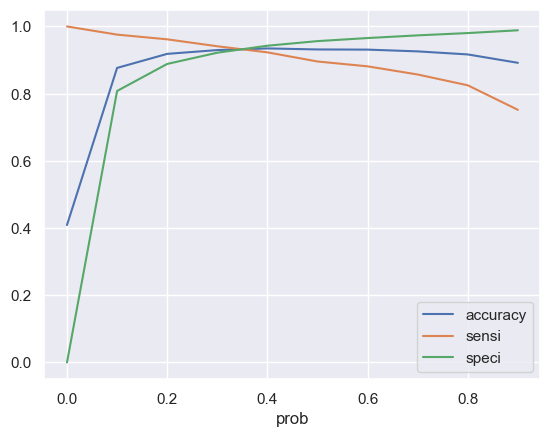

In [106]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

###  The various cutoff are plotted and 0.38(approx 0.4) is where all values are converging. Let's re-calculate the final predicted values using 0.4 as threshold.

In [107]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index,predicted,Conversion_Prob%,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.954038,4278,1,95.40,1,1,1,1,1,1,1,1,1,1,1
1,0,0.007987,5893,0,0.80,1,0,0,0,0,0,0,0,0,0,0
2,0,0.030412,380,0,3.04,1,0,0,0,0,0,0,0,0,0,0
3,0,0.116549,8976,0,11.65,1,1,0,0,0,0,0,0,0,0,0
4,1,0.986969,4197,1,98.70,1,1,1,1,1,1,1,1,1,1,1


In [140]:
## Assigning Lead Score to the training dataset
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [141]:
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index,predicted,Conversion_Prob%,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1,0.954038,4278,1,95.40,1,1,1,1,1,1,1,1,1,1,1,95
1,0,0.007987,5893,0,0.80,1,0,0,0,0,0,0,0,0,0,0,1
2,0,0.030412,380,0,3.04,1,0,0,0,0,0,0,0,0,0,0,3
3,0,0.116549,8976,0,11.65,1,1,0,0,0,0,0,0,0,0,0,12
4,1,0.986969,4197,1,98.70,1,1,1,1,1,1,1,1,1,1,1,99


In [108]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9345810150059012

In [109]:
# Create Confusion Matrix again for new threshold
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3304,  201],
       [ 187, 2239]], dtype=int64)

In [110]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [111]:
# SENSITIVITY
print("Sensitivity:",round(100*(TP/float(FN+TP)),2),"%")

Sensitivity: 92.29 %


In [112]:
# SPECIFICITY
print("Specificity:",round(100*(TN/float(TN+FP)),2),"%")

Specificity: 94.27 %


In [113]:
# FALSE POSITIVE RATE
print("FPR:",round(100*(FP/float(FP+TN)),2),"%")

FPR: 5.73 %


In [114]:
# FALSE NEGATIVE RATE
print("FNR:",round(100*(FN/float(FN+TP)),2),"%")

FNR: 7.71 %


In [115]:
# positive predictive value
print("Positive Predictive Power:",round(100*(TP/float(TP+FP)),2),"%")

Positive Predictive Power: 91.76 %


In [116]:
# negative predictive value
print("Negative Predictive Power:",round(100*(TN/float(TN+FN)),2),"%")

Negative Predictive Power: 94.64 %


In [117]:
# ACCURACY SCORE
print("ACCURACY SCORE:",round(100*((TP+TN)/(TP+TN+FP+FN)),2),"%")

ACCURACY SCORE: 93.46 %


## <font color = blue> Part 1F. Precision and Recall </font>

In [118]:
print("Precision Score of the Model:",round(100*(precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)),2),"%")

Precision Score of the Model: 91.76 %


In [119]:
print("Recall Score of the Model:",round(100*(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)),2),"%")

Recall Score of the Model: 92.29 %


In [120]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

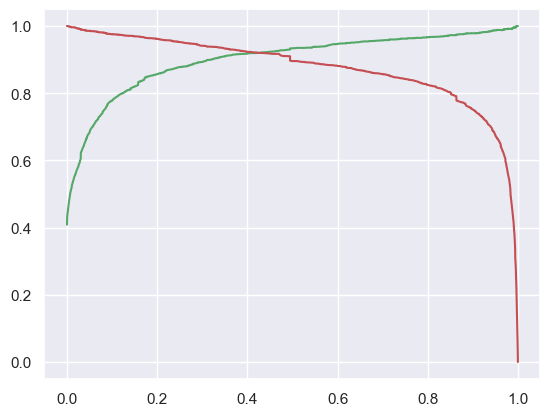

In [121]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## <font color = blue> Part 2: Test Data Predictions </font>

### Transform the test data

In [122]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [123]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Do Not Email_No,Lead Origin_Landing Page Submission,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_Unreachable,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Specialization_Retail Management,Specialization_Travel and Tourism,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Worst,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium
7813,-0.450868,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7256,-0.919072,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
6531,-0.919072,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
314,-0.580525,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9094,0.447724,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


### Add constant to test data befpre predictions

In [124]:
X_test_sm = sm.add_constant(X_test)

### Create y_test predictions

In [125]:
y_test_pred = res.predict(X_test_sm)

In [126]:
y_test_pred[:10]

7813    0.002428
7256    0.059989
6531    0.112187
314     0.039416
9094    0.722985
1284    0.176405
3842    0.014948
1611    0.251643
8592    0.995241
493     0.943023
dtype: float64

### Converting y_pred to a dataframe from an array

In [127]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [128]:
# Let's see the head
y_pred_1.head()

,0
7813,0.002428
7256,0.059989
6531,0.112187
314,0.039416
9094,0.722985


### Converting y_test to dataframe

In [129]:
y_test_df = pd.DataFrame(y_test)

In [130]:
# Putting index as Lead Index
y_test_df['Lead Index'] = y_test_df.index

In [131]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [132]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [133]:
y_pred_final.head()

,Converted,Lead Index,0
0,0,7813,0.002428
1,0,7256,0.059989
2,0,6531,0.112187
3,0,314,0.039416
4,1,9094,0.722985


In [134]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [135]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Lead Index,Converted_Prob
0,0,7813,0.002428
1,0,7256,0.059989
2,0,6531,0.112187
3,0,314,0.039416
4,1,9094,0.722985


In [136]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final['Conversion_Prob%'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100,2))

# Let's see the head
y_pred_final.head()

,Converted,Lead Index,Converted_Prob,final_predicted,Conversion_Prob%
0,0,7813,0.002428,0,0.24
1,0,7256,0.059989,0,6.00
2,0,6531,0.112187,0,11.22
3,0,314,0.039416,0,3.94
4,1,9094,0.722985,1,72.30


In [138]:
## Adding the "Lead_Score" column::-

y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [139]:
y_pred_final.head()

,Converted,Lead Index,Converted_Prob,final_predicted,Conversion_Prob%,Lead_Score
0,0,7813,0.002428,0,0.24,0
1,0,7256,0.059989,0,6.00,6
2,0,6531,0.112187,0,11.22,11
3,0,314,0.039416,0,3.94,4
4,1,9094,0.722985,1,72.30,72


In [ ]:
# Let's check the overall accuracy of Test Predictions
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

### <font color = blue> Create Test Data Confusion Matrix </font>

In [ ]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

In [ ]:
TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

In [ ]:
# SENSITIVITY
print("Sensitivity of the Test Predictions:",round(100*(TP_test/float(FN_test+TP_test)),2),"%")

In [ ]:
# SPECIFICITY
print("Specificity of the Test Predictions:",round(100*(TN_test/float(TN_test+FP_test)),2),"%")

In [ ]:
# ACCURACY SCORE
print("ACCURACY SCORE of the Test Data Predictions:",round(100*((TP_test+TN_test)/(TP_test+TN_test+FP_test+FN_test)),2),"%")

### <font color =blue> Precision and Recall </font>

In [ ]:
print("Precision Score of the Test Data Predictions:",round(100*(precision_score(y_pred_final.Converted, y_pred_final.final_predicted)),2),"%")

In [ ]:
print("Recall Score of the Test Data Predictions:",round(100*(recall_score(y_pred_final.Converted, y_pred_final.final_predicted)),2),"%")

In [ ]:
# Let's check the overall accuracy.
print("Accuracy of the Test Data Predictions:",round(100*(metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted)),2),"%")

In [ ]:
X_train_sm = sm.add_constant(X_train[col])
logm6=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial())
res=logm6.fit()
res.summary()

# Final Conclusion 


#### Area Under Curve (AUC) value of 0.98


# Scores on Train set
- Sensitivity: 92.29 %
- Specificity: 94.27 %
- ACCURACY SCORE: 93.46 %

- Precision Score of the Model: 91.76 %

- Recall Score of the Model: 92.29 %
# Scores on Test set
- Sensitivity of the Test Predictions: 91.86 %
- Specificity of the Test Predictions: 93.75 %
- Precision Score of the Test Data Predictions: 90.6 %
- Recall Score of the Test Data Predictions: 91.86 %
- Accuracy of the Test Data Predictions: 93.0 %

# With the following predictors, we have achieved scores as given above 

## Positive Predictors 
- - A customer with these TAGS assigned is a potential Lead: "Closed by Horizzon", "Lost to EINS", "Will revert after reading the email"
- - A customer Lead sourced by "Welingak Website" is a Hot Lead.
- - A customer who is currently "Working Professional" or "Unemployed" is a Hot Lead.
- Lead Profile_Lateral Student- 25.4200	
- Tags_Closed by Horizzon: 6.0962
- Lead Source_Welingak Website: 5.1297
- Tags_Lost to EINS: 4.9405
- Tags_Will revert after reading the email: 3.1744
- What is your current occupation_Working Professional: 1.98
- What is your current occupation_Unemployed: 1.5563


## Negative Predictors 
- - A customer with these TAGS assigned is NOT a potential Lead: "Already a Student", "switched off", "Not doing further education", "Diploma holder (Not Eligible)", "Ringing", "Interested in other courses", "Interested in full time MBA"
- - A customer whose Lead Quality is deemed as "Worst" is also NOT a Hot Lead.

- const: -3.9500
- Tags_Already a student: -4.0948
- Tags_switched off: -4.4765	
- Tags_Not doing further education: -3.0528
- Lead Quality_Worst: -3.6051
- Tags_Diploma holder (Not Eligible): -2.9483
- Tags_Ringing: -4.1671
- Tags_Interested in other courses: -2.7307
- Tags_Interested in full time MBA: -2.5468


